### 1.1 Introduction

When we look at car companies, we see that they retail cars at different prices, based on a several factors such as size, miles per gallon (mpg) and other parameters. If a new car company plans to invest in manufacturing cars, it will be useful for the company to gain insights of which factors affect the prices of the car respectively. 
The use of machine learning for prediction is common in data science, hence we can use different machine learning models to predict the prices of cars. Data science also allow us to use different tools to analyse the correlation of the car features for the manufacturing of cars and how it may affect car prices. By understanding the data and its correlation, valuable insights can be provided for new companies who wants to be future car retailers. 


### 1.2 Source of Data

Below is the link to the dataset we use for our analysis. 

https://www.kaggle.com/CooperUnion/cardataset

There are unique cars such as Lamborghini that fetches ridiculous price points. However, there are also affordable car brands to consider such as Nissan.  The Exploration Data Analysis that we want to do will give us an overview how features of cars can be used to predict the price points. 

We will start of with reading the data, visualing the plots, clean the data by removing the empty values, the outliers and turning the catergorical values to numerical for algorithm analysis, and lastly to use various machine learning models that are useful for predicting the prices of cars. Additionally, we will compare the various machine learning models and see which produces the best results, so we can give some new insights to recommend the machine learning model to use for real data.


### 1.3 Metrics considered

1. Mean Absolute Error (MAE)

MAE is the average of all absolute errors. It computes the absolute average distance between the real data and predicted data, but fails to address large errors in prediction. The idea is to preserve the same units of measurement as the data under analysis and gives all individual erros the same weights (as compared to squared error). This Distance is easily interpretable and when aggregated over a dataset using arithmetic mean has a meaning of the average error.

Importantly, this metric gives an average of the absolute differences between the predicted and actual values. It's straight forward and easy to interpret since it's in the sam eunits as the target variable. The lower the MAE, the better the model's performance.

2. Mean Squared Error (MSE)

The squared error follows the same idea as the absolute error, to avoid negative error values and mutual cancellation of errors. When squared, the large errors are emphasized and have a relatively greater effect on the value of the performance metric. At the same time, the effect of relatively smaller errors will be even smaller. Sometimes this property of squared error is referred to as penalizing or addressing extreme errors or being susceptible to outliers. For example, emphasizing large errors may be a desirable discrimating measure in evaluating models. In case of data outliers, the MSE will become much larger compared to MAE. Avoiding the potential of mutual cancelations has its price, skewness (bias) cannot be determined (for MAE).In mSE, error increases in a quadratic fashion while the error increases in a proportional fashion in MAE. In MSE, since error being squared, any prediction error is heavily penalized.

Importantly, this metric squares the difference between the predicted and actual values, which penalizes larger errors more severely than smaller ones. Like MAE, a lower MSE indicates better performance, but because of the squaring, MSE is more sensitive to outliers than MAE.



When evaluating models, a model with both a low MAE and MSE is considered good, but these two metrics can sometimes tell a slightly different story.  A low MAE with high MSE might indicate that while a model is generally accurate, there are a few predictions with large errors (potential outliers). Conversely, a high MAE with a low MSE might suggest that the model consistently makes moderate errors but doesn't have extreme errors.

For this notebook, we will look at both Mean Absolute Error (MAE) and Mean Squared Error (MSE), to determine the performance of the machine learning model. Which is more accurate will have the least MAE and MSE. We have to also check if the MAE and MSE computated are proportional to each other to validate if the process is right.
Ref:
https://arxiv.org/pdf/1809.03006.pdf?ref=hackernoon.com

### 1.4 Questions to consider when predicting the car price (to be filled)

In order to evaluate how we gonna predict the car price, we have to consider the questions chronologically. 

1. Look at the car dataset and see the counting for each variables?
2. Are there any missing values in each variable of the dataset?
3. How is city mpg and highway mpg correlated using box plot? Address the outliers as well when comparing and for future machine learning test. 
4. Which features are heavily correlated to one another by using heat map?
5. Check for NULL missing values, and make sure the data is filled or drop the variable so the machine learning will not encounter any problems?
6. Create a new column for Present Year (2024) and plot the Years of Manufacture, this variable will be considered as well for the machine learning model?
7. Check the data again for variables that has catergorical values, we have to address them by changiner to numerical values for the machine learning to analyse?
8. Plot the different machine learning model and check which prediction model has the best result, in terms of lowest mean squared error (MSE) and lowest mean absolute error (MAE), when also checking for which range of values work best?

### 1.5 Importing libraries
We start to import some libraries for understanding the data, visualizing and gain insights about the different machine learning models. Below are the libraries considered that we want to be imported. 

In [1001]:
!pip install missingno
!pip install category_encoders
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

## 1.6 Reading the data
We want to use pandas when reading our dataset. We will be storing the visualising into a variable called 'data' for various calculations later. 

In [1002]:
data = pd.read_csv('data.csv')

In [1003]:
data.shape

(11914, 16)

In [1004]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2.1 Countplot 

We use Countplots with the help of seaborn library in python to give us a visualizing of the total number of values present in each variable columns that we want to consider.  Look below for a list of countplots for different features that we feel are interesting. This will help us understand the overall distribution of the data based on different car features. 

## Getting the unique elements from the data

Before we use the count plot, we want to gain insights of the data by the number of unique variables. We see from below that there are a few columns for features such as 'Driven_Wheels, 'Number of Doors', 'Vehicle Size', 'Vehicle Style', etc. We want to start this dataset as the variables considered should be smaller so this dataset is useful for us who wants to have only features that are more relevant when dealing with price prediction and not to consider other data such as details of transactions, the different parties considered, as well as the customer ratings and satisfaction. So this dataset is good as it has only around 16 categories. In addition to this, we see that there are a few features that contain a lot of unique categorical values (unique classifier). Some of the features include 'Model', 'Engine HP', 'Market Category', etc. This should be expected in real life as we should have different models of cars and also different values of horsepower (hp).

In [1005]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [1006]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2.1.1 Countplot of different car make

We want to use seaborn's countplot to check the total number of cars per company that we have in our dataset. Based on the visualisation, we can see that the company 'Chevrolet' has the most cars in our dataset. We also see that there are companies with only afew cars such as 'Bugatti' and 'McLaren' which is reflective of the real-world as we don't find different models of these cars. A countplot could really give us a good understanding of the data that we are working. 

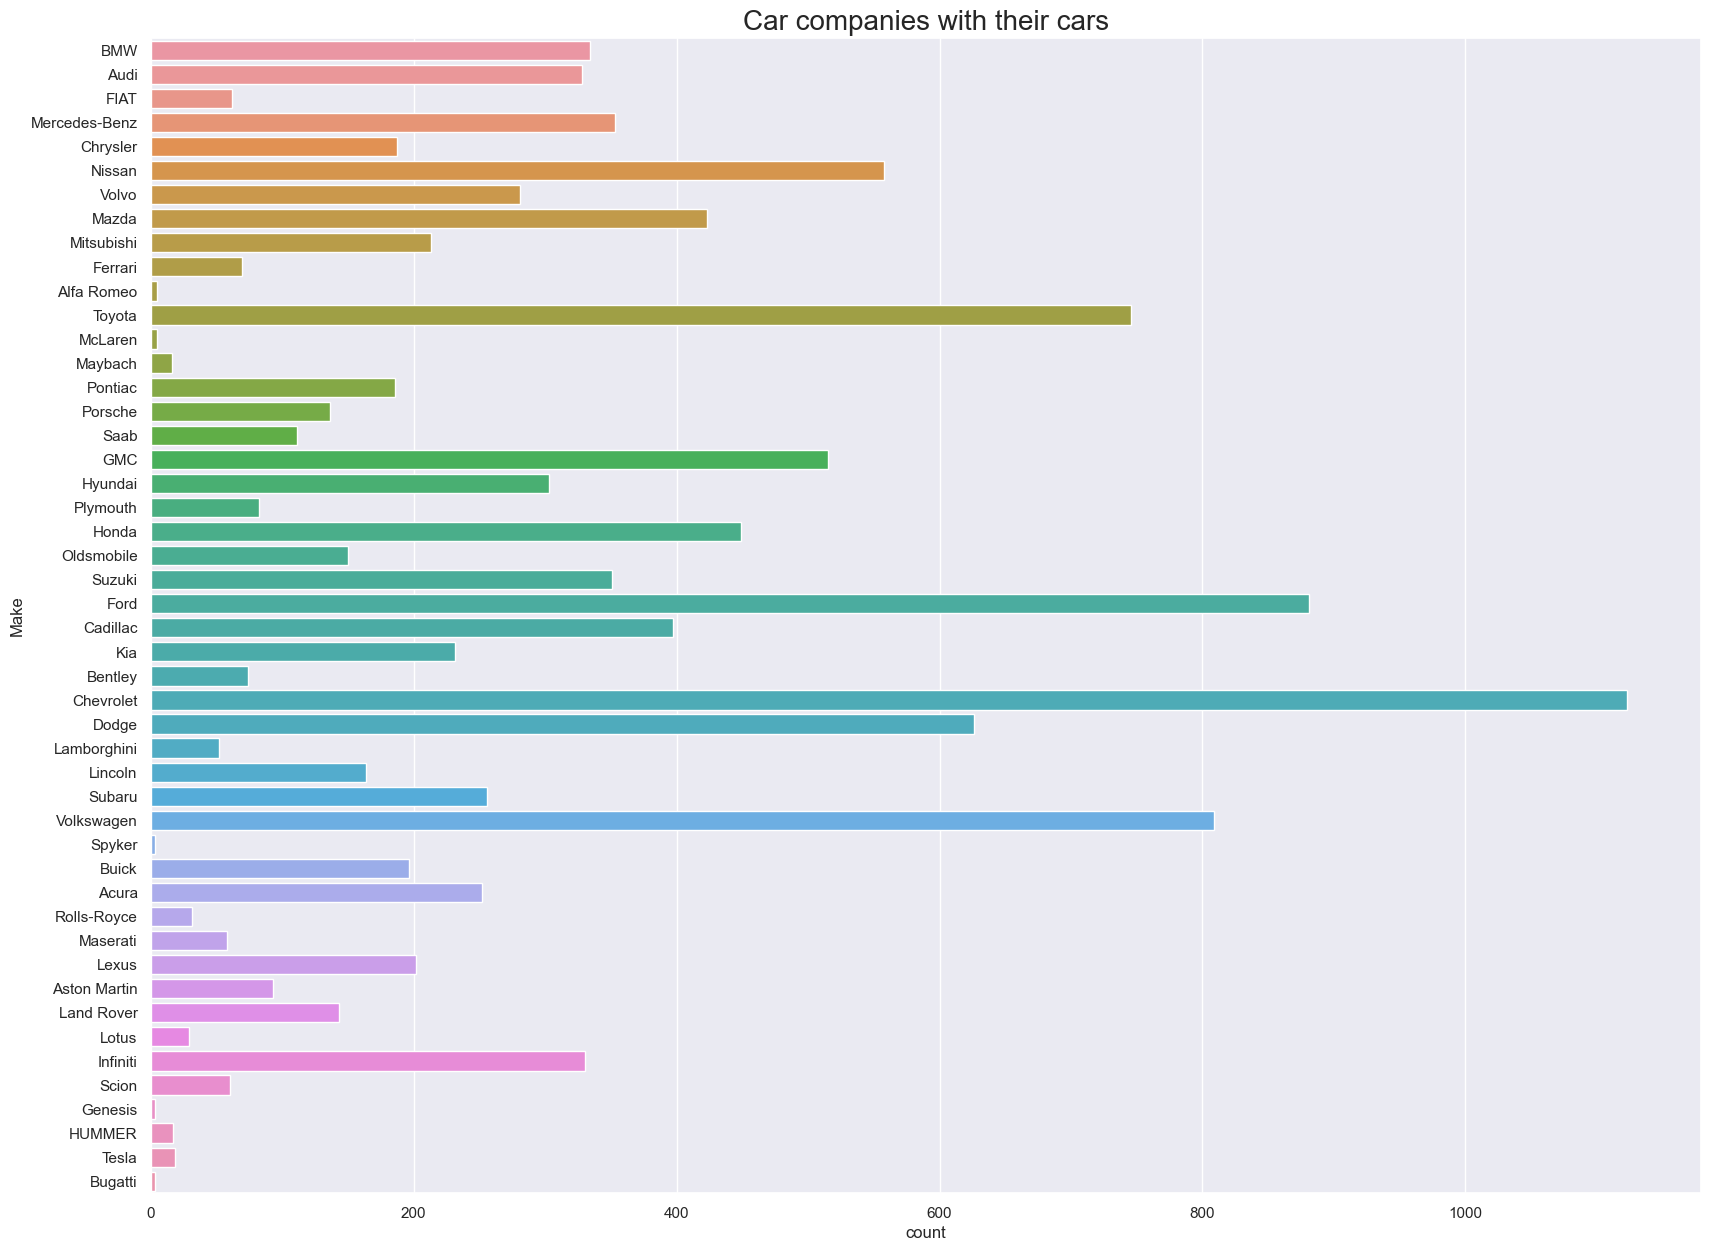

In [1007]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

## 2.1.2 Countplot of total cars in different years

Below is the countplot for total number of cars in diffferent year chronologically. We find that there are many cars manufactured in the year from 2015 to 2017 compared to the other years in our dataset. Based on the graph, it is relatively recent within a decade, so we can use this to gain insights of how the future cars can be market at similar price without drastic change.

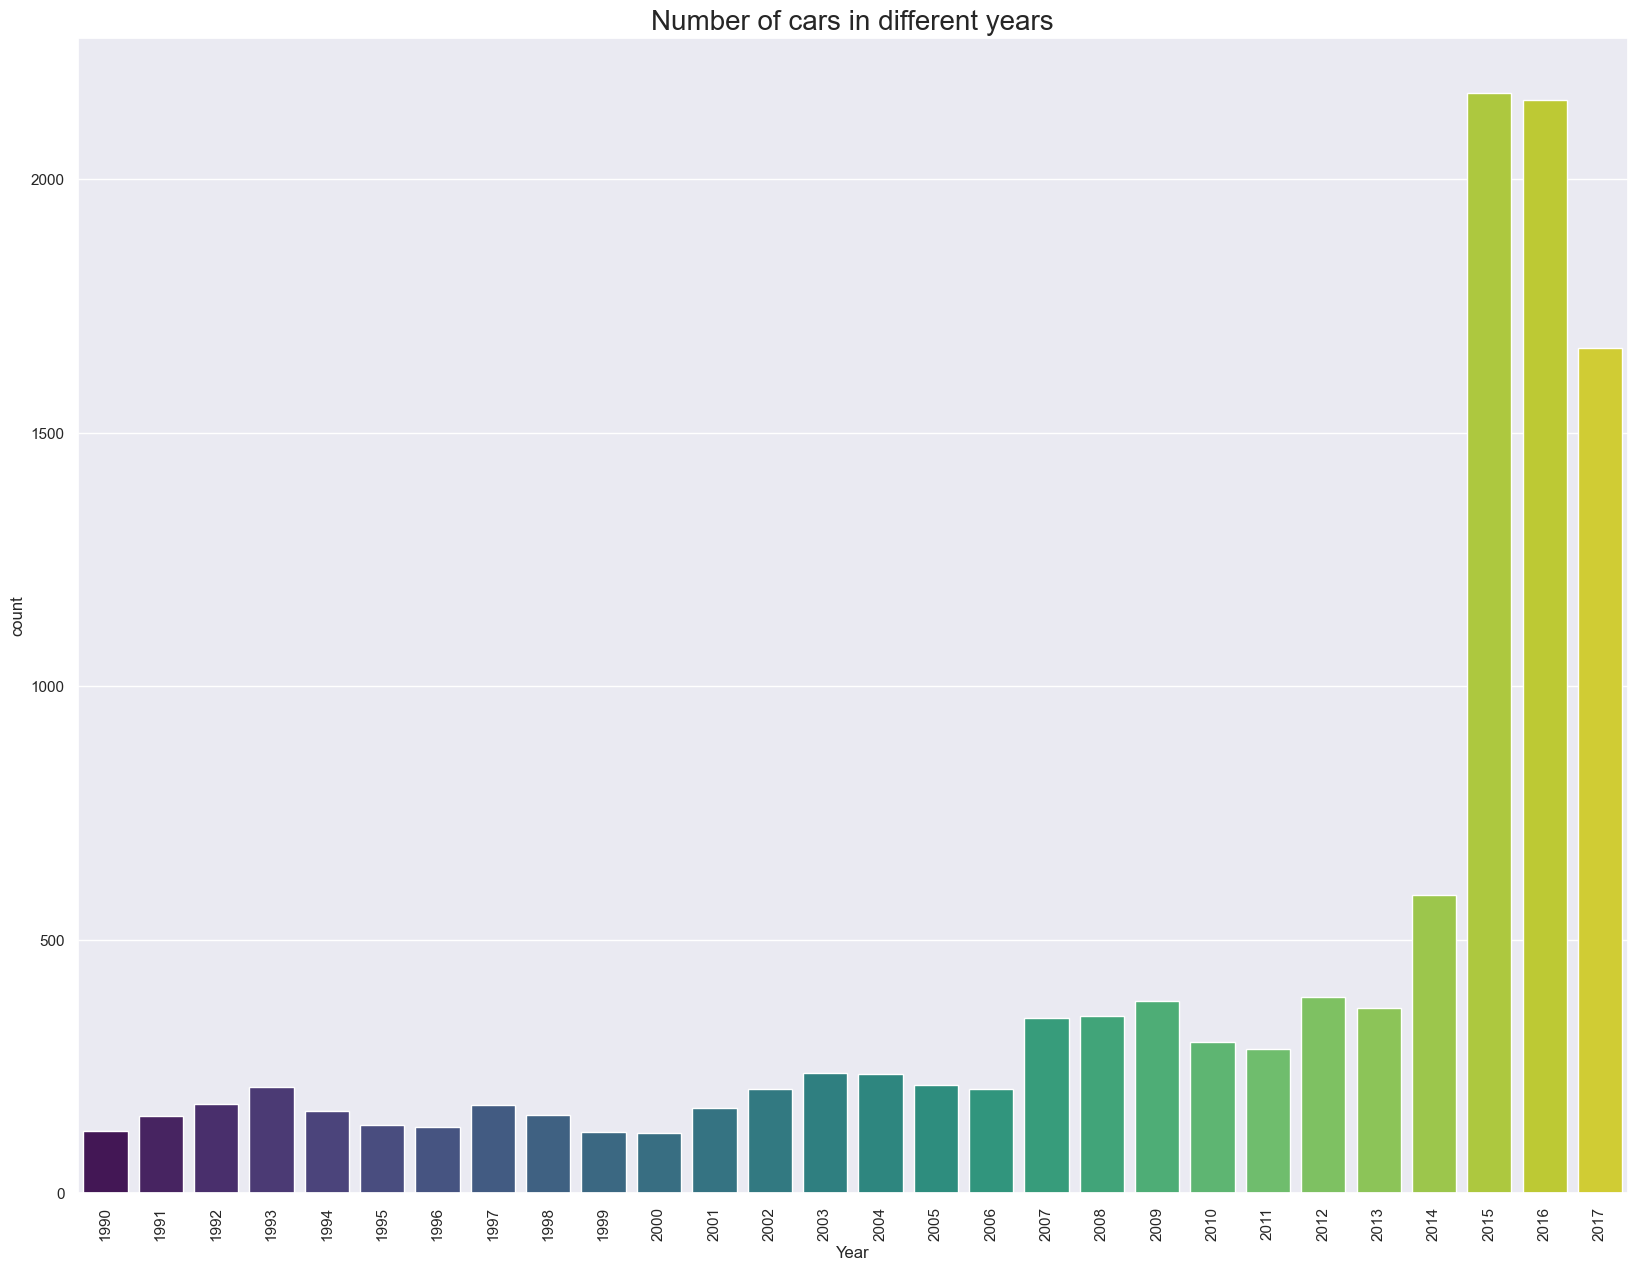

In [1008]:
plt.figure(figsize=(20, 15))  # Set a larger figure size to accommodate the bars
sns.countplot(x='Year', data=data, palette='viridis')  # Ensure 'x' is specified for clarity
plt.title("Number of cars in different years", fontsize=20)
plt.xticks(rotation=90)  # Rotate the x-axis labels to avoid overlap
plt.show()

## 2.1.3 Countplot the cars with different transmission type

Below is the countplot for different transmission type and the number of cars with this type of transmission, there are alot of values for automatic and manual, automatic is more than manual so this is a good indicator that in future as we move to a marketplace that will potentially be saturated with electronic vehicles (EV) or manual cars. Some customer prefer manual cars as they want to drive, and some prefer EV and it may be best to have both as well. But for both automate and manual there are very little data but currently is fine now as it is reflective of the present years but in future we should consider cars that have both automatic and manual mode.

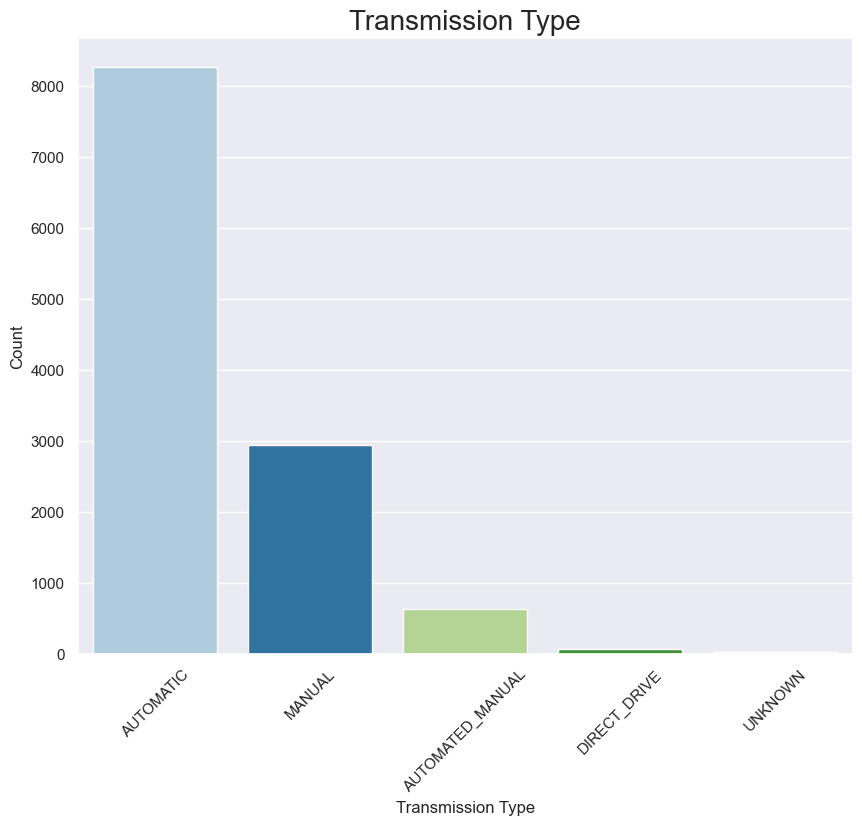

In [1009]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.countplot(x='Transmission Type', data=data, palette='Paired', order = data['Transmission Type'].value_counts().index)
plt.title("Transmission Type", fontsize=20)
plt.xticks(rotation=45)  # Rotate the labels for better legibility
plt.xlabel('Transmission Type')  # Ensure there's a label for the x-axis
plt.ylabel('Count')  # Ensure there's a label for the y-axis
plt.show()

## 2.1.4  Countplot of engine fuel type

Below is the countplot for engine fuel types with the number of cars for this features. We can see that majority of cars have 'regular unleaded' feature, also 'premium unleaded; both required and recommended, are also considered. as well as flex-fuel. Similar to before currently and present years there is still top up of fuels, and the car market is not dominant with electric mode of cars, so we do not have to concern ourself with that. But in future, we should work on dataset that are electric and disel related.

<Axes: xlabel='count', ylabel='Engine Fuel Type'>

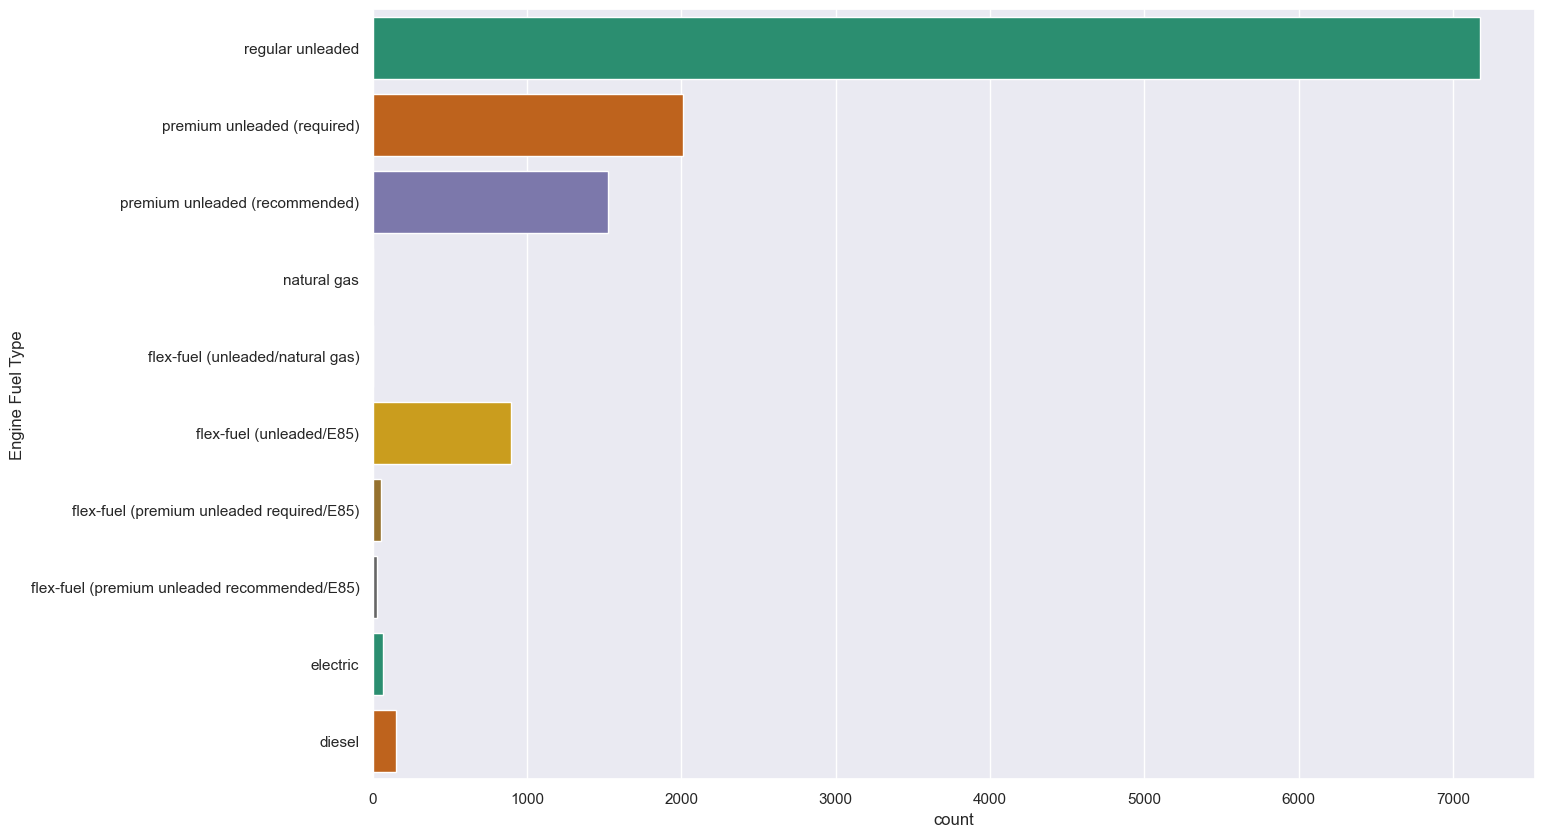

In [1010]:
plt.figure(figsize = (15, 10))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')

## 2.1.5 Countplot of vehicle size 

Below is the countplot for different vehicle size, we can see that most of the cars are compact and the least cars are of large size, which is a reflection of the real world as large cars are for family use, and compact cars are more common.

<Axes: xlabel='Vehicle Size', ylabel='count'>

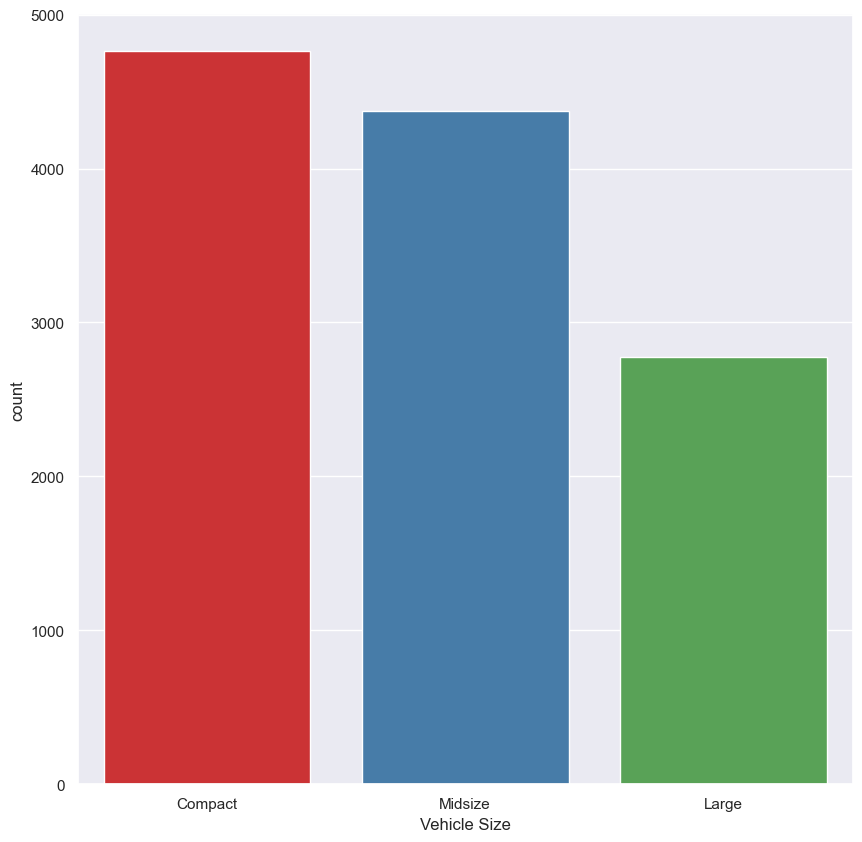

In [1011]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

## 2.2 Missingno

We want to Missingno library from python as it gives us a good graphic representation of which variables has missing values so that later on we can either fill up the missing values with median or we can drop the variable feature completely. We can see that the variable ' Market Category' has the most missing values, and some variable 'Engine HP' Engine Fuel Type' has abit of missing values so we need to address them before we can test the machine learning model. We will use encoding and one hot encoding to do the machine learning later. 

<Axes: >

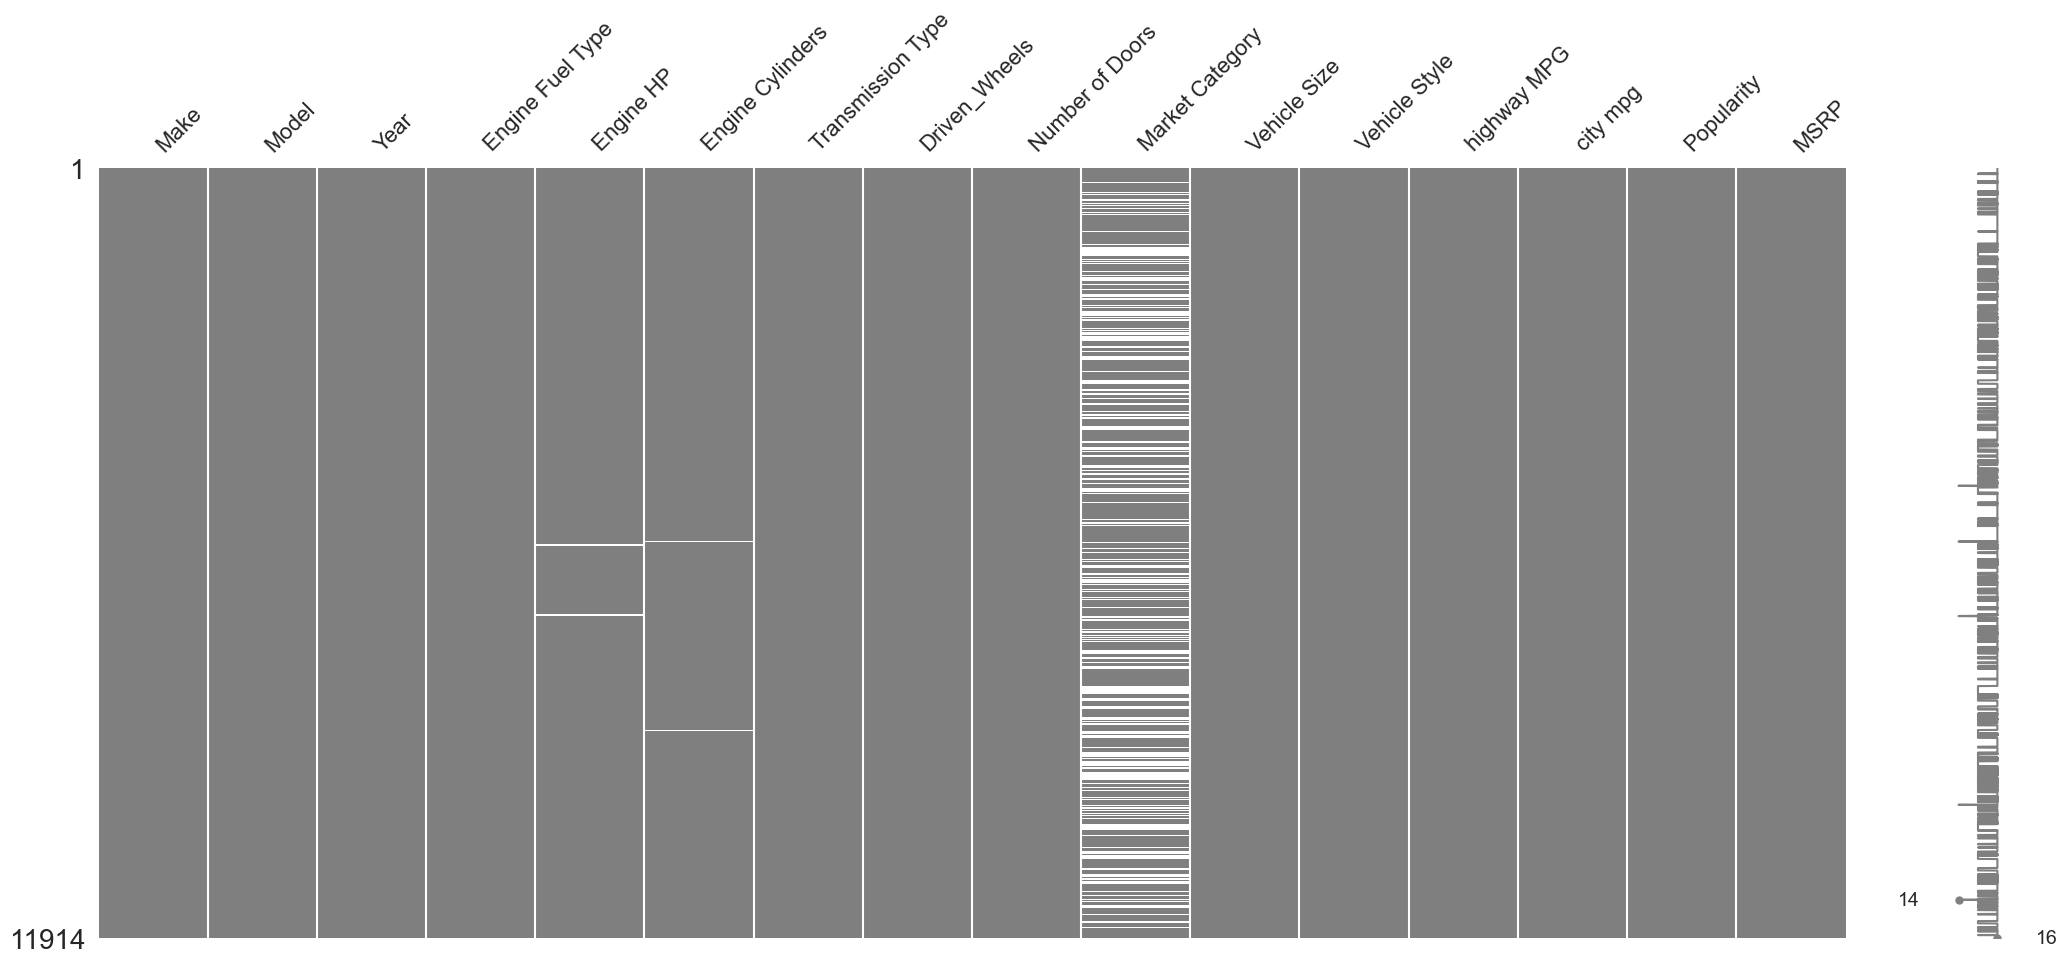

In [1012]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

## 2.3 Groupby 

We want to use Groupby function in python as we can group the values according to one side is two types of features, that we give to Groupby function and other compuation such as mean, median, mode or other metrics can be performed once we group up the data. We can look below at some of the plots which are 'MSRP' and 'Popularity' against the make, car brand, and the average price of cars in different years. Additionally we have Make against the feature of 'Enginer HP', 'Engine Cylinders', 'highway MPG' and 'city mpg' for min, max and mean values. This gives us insights of how one feature influence the other feature.

## 2.3.1 Group with car make with other features

We want to use groupby to find the make car brand according to the minimum element in particular group, maximum element in a particular variable. Here, we see that we have grouped the data on the basis of 'Make' and considered a few features such as 'Engine HP', 'Engine Cylinders', 'highway MPG' and 'city mpg'. We can also see the minimum, maximum values, and mean values of the data. This is to get a good idea of the values concerned with each car brand and the features.

In [1013]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

## 2.3.2  Group with average price of cars in different years

Below is the groupby plot which we see the different years according to the different average price for each years for car. Based on this we can have a insight of how the prices change of each year so we can look at the competitive price landscape of cars to adjust the retail price to make it seem reasonable without any loss of profit while gaining the customer demand. 

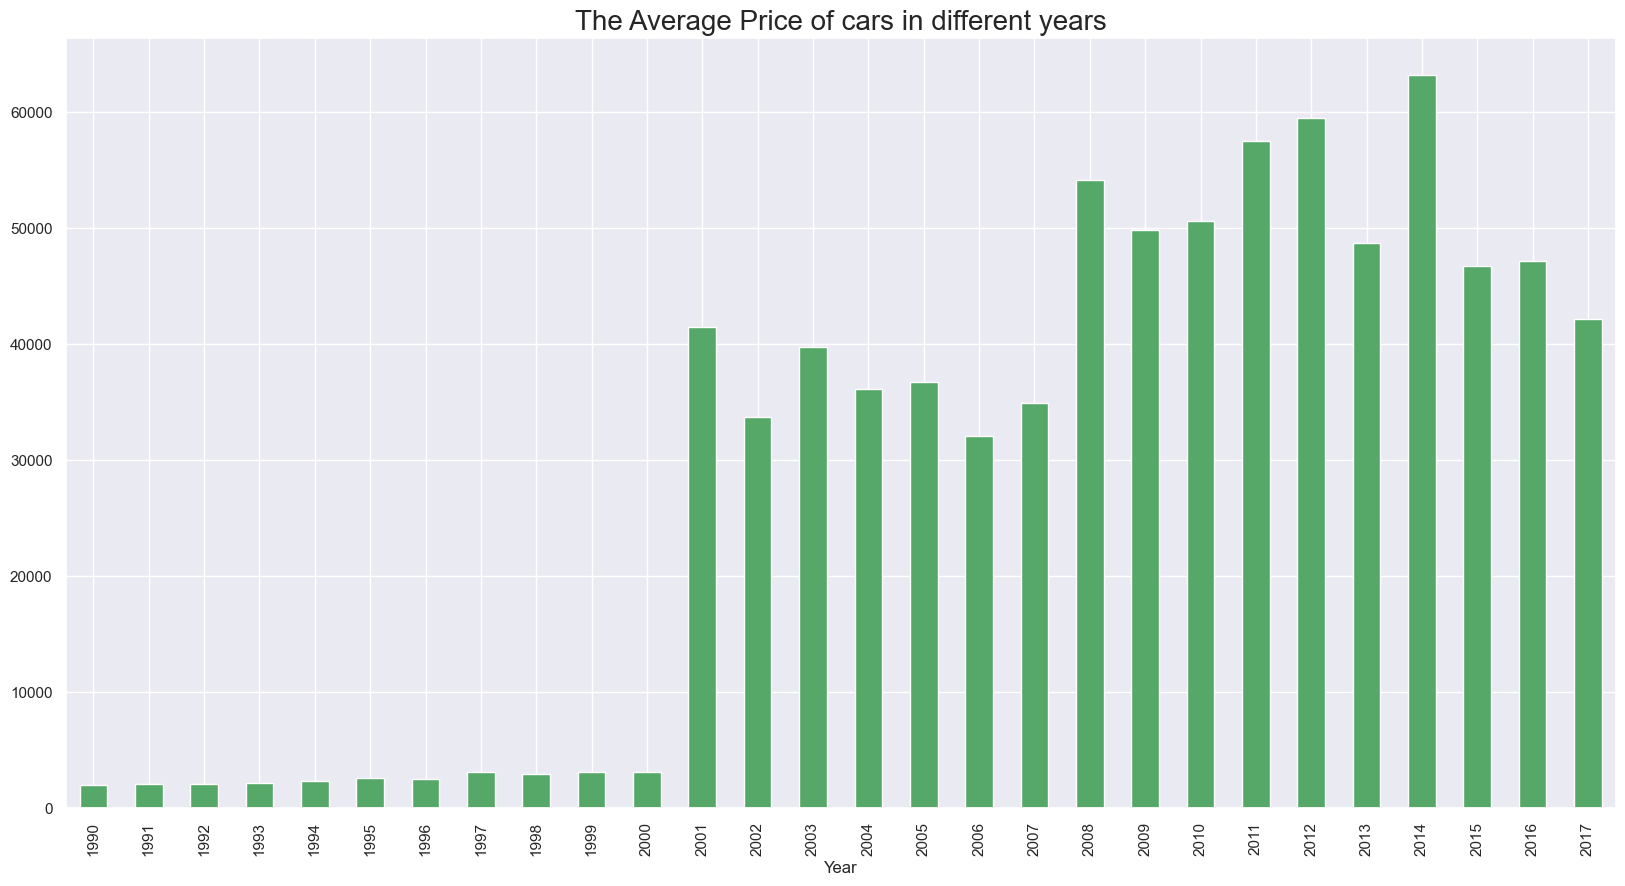

In [1014]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()


## 2.3.3 Group with make and 'MSRP'

Below is the groupby plot where we want to see different average price points for each car brand. we can see that the highest is Bugatti which is the most expensive car brand in the present world, and the most affordable is like Toyota, Nissan, Hyundai, Kia.

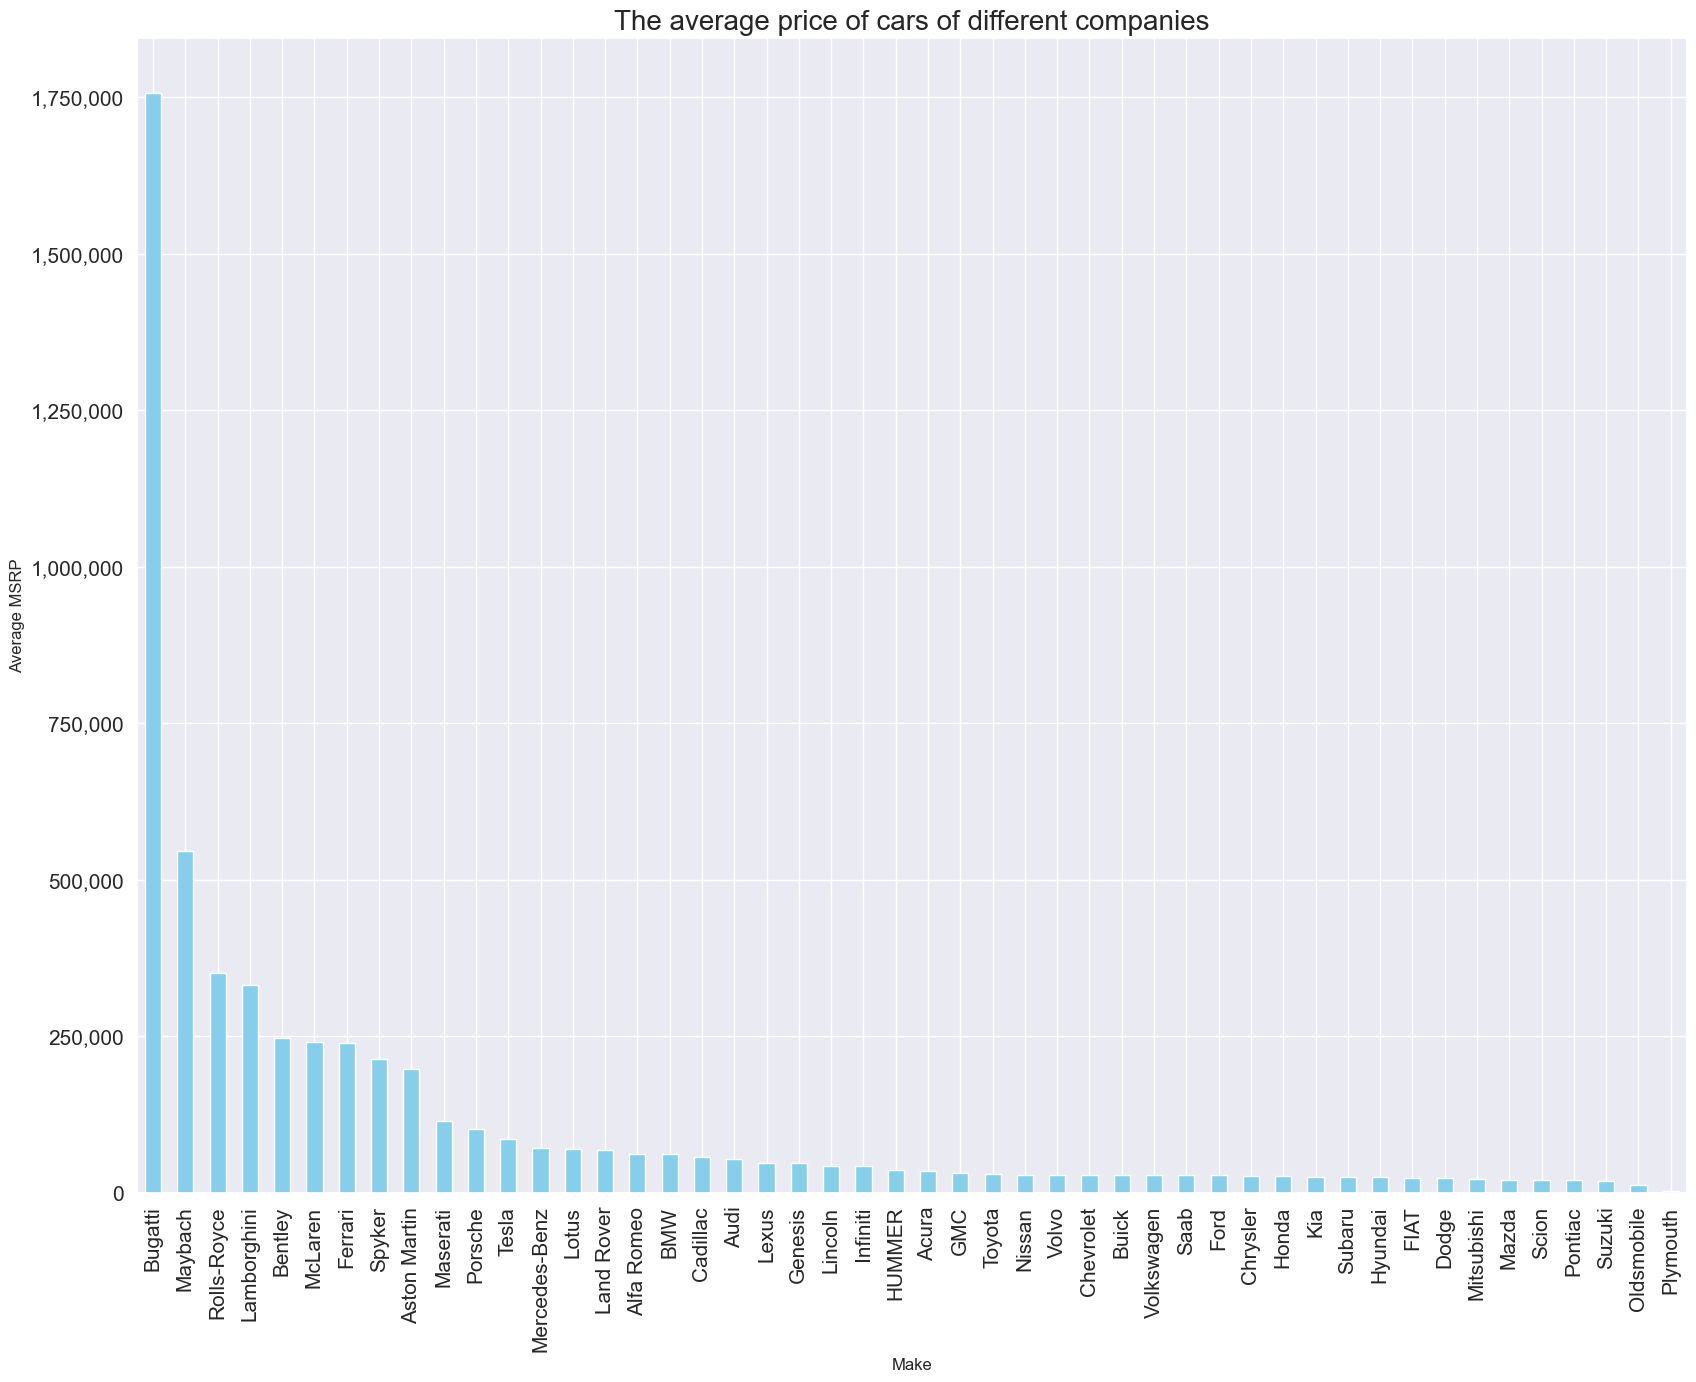

In [1015]:
import matplotlib.ticker as ticker

plt.figure(figsize=(20, 15))  # Adjust the figure size to be wide enough for readability
grouped_data = data.groupby('Make')['MSRP'].mean().sort_values(ascending=False)  # Group and sort the data
grouped_data.plot(kind='bar', fontsize=15, color='skyblue')  # Plot the data
plt.title("The average price of cars of different companies", fontsize=20)  # Set the title and font size
plt.xticks(rotation=90)  # Rotate the x-axis labels to prevent overlap
plt.ylabel('Average MSRP')  # Set the y-axis label
plt.xlabel('Make')  # Set the x-axis label

# Set y-axis major ticks to intervals of 250,000
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(250000))

plt.show()

## 2.3.4 Group with make and 'Popularity' values

Below is the Groupby plot for popularity of various car brands, where we see that most people get For and BME, while very little in Lincoln and Genesis that we are also not aware of.   

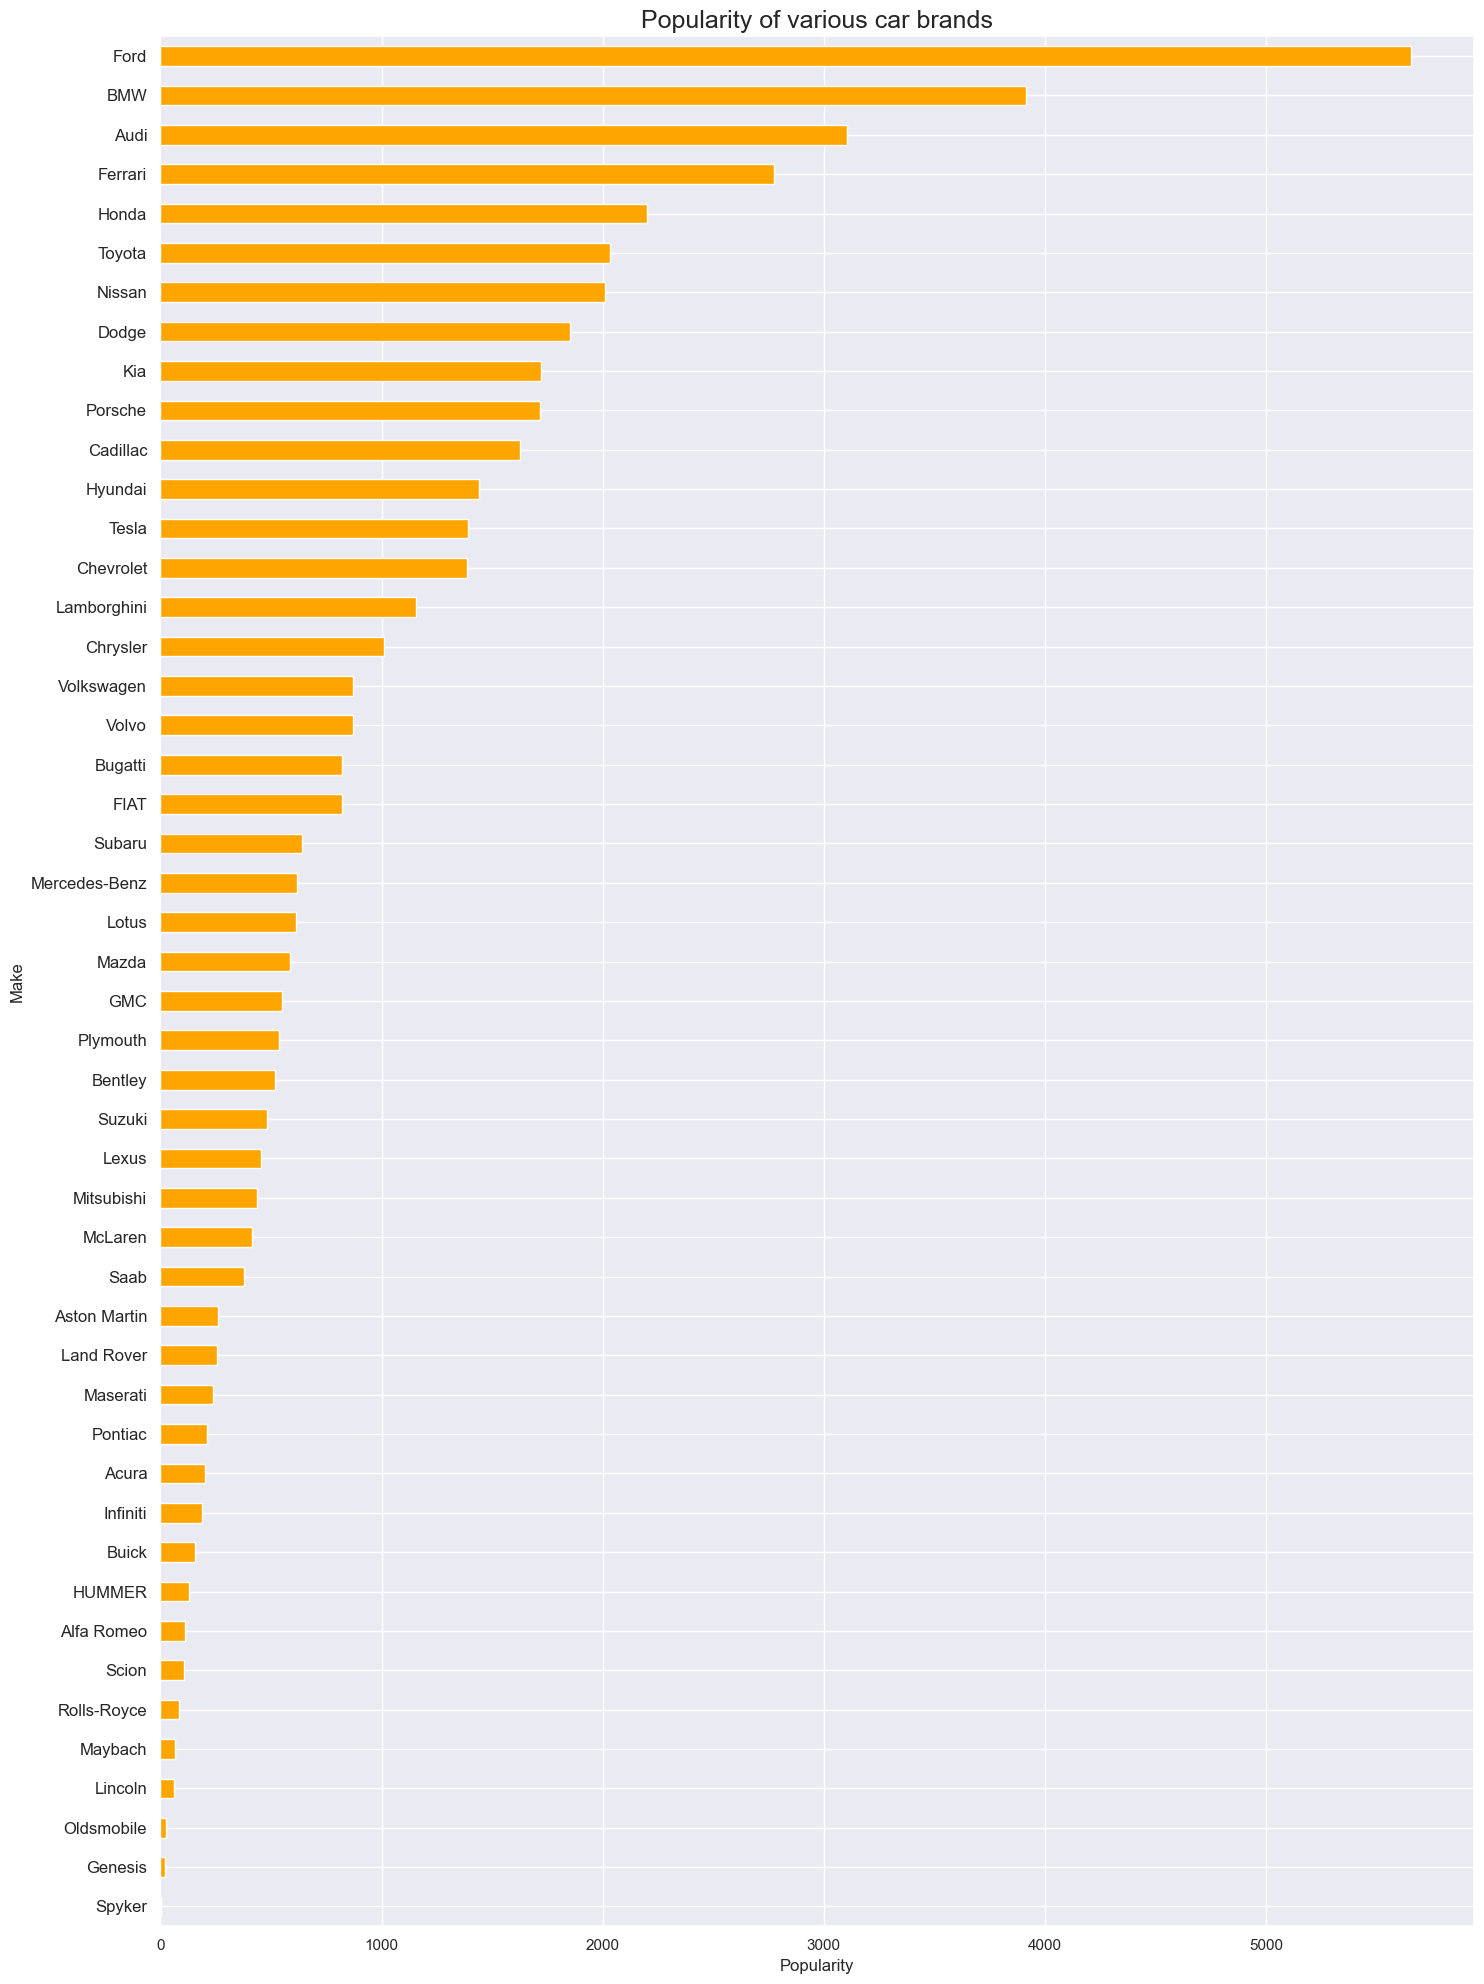

In [1016]:
plt.figure(figsize=(15, 20))  # Adjust the height if necessary to fit all y-axis labels comfortably
popularity = data.groupby('Make')['Popularity'].mean().sort_values(ascending=True)  # Sort the values in ascending order
popularity.plot(kind='barh', color='orange')  # Create a horizontal bar plot
plt.yticks(fontsize=12)  # Increase fontsize for y-axis labels if necessary
plt.title("Popularity of various car brands", fontsize=18)  # Adjust title fontsize as needed
plt.xlabel('Popularity')  # Label for the x-axis
plt.tight_layout()  # Adjust the layout
plt.show()


## 2.4 Scatterplot between 'highway MPG' and 'city mpg'

Now we want to consider the linear relationship between 'highway MPG' and 'city mpg' as both of the mpg (miles per gallon) are similar and they should be correlated for the dataset we are using, they they are not correlated, we have to expect that the computation for prediction may be wrong. Therefore, we cannot have dataset that have a highway mpg that differs from city mpg. Based on the plot below, there is one outlier where the highway mpg is about 350. We have to remove the outlier as there should not be cars that have this high mpg, so we need to remove it as it will affect our results as errors in the data can cost the machine learning operation to fail. 

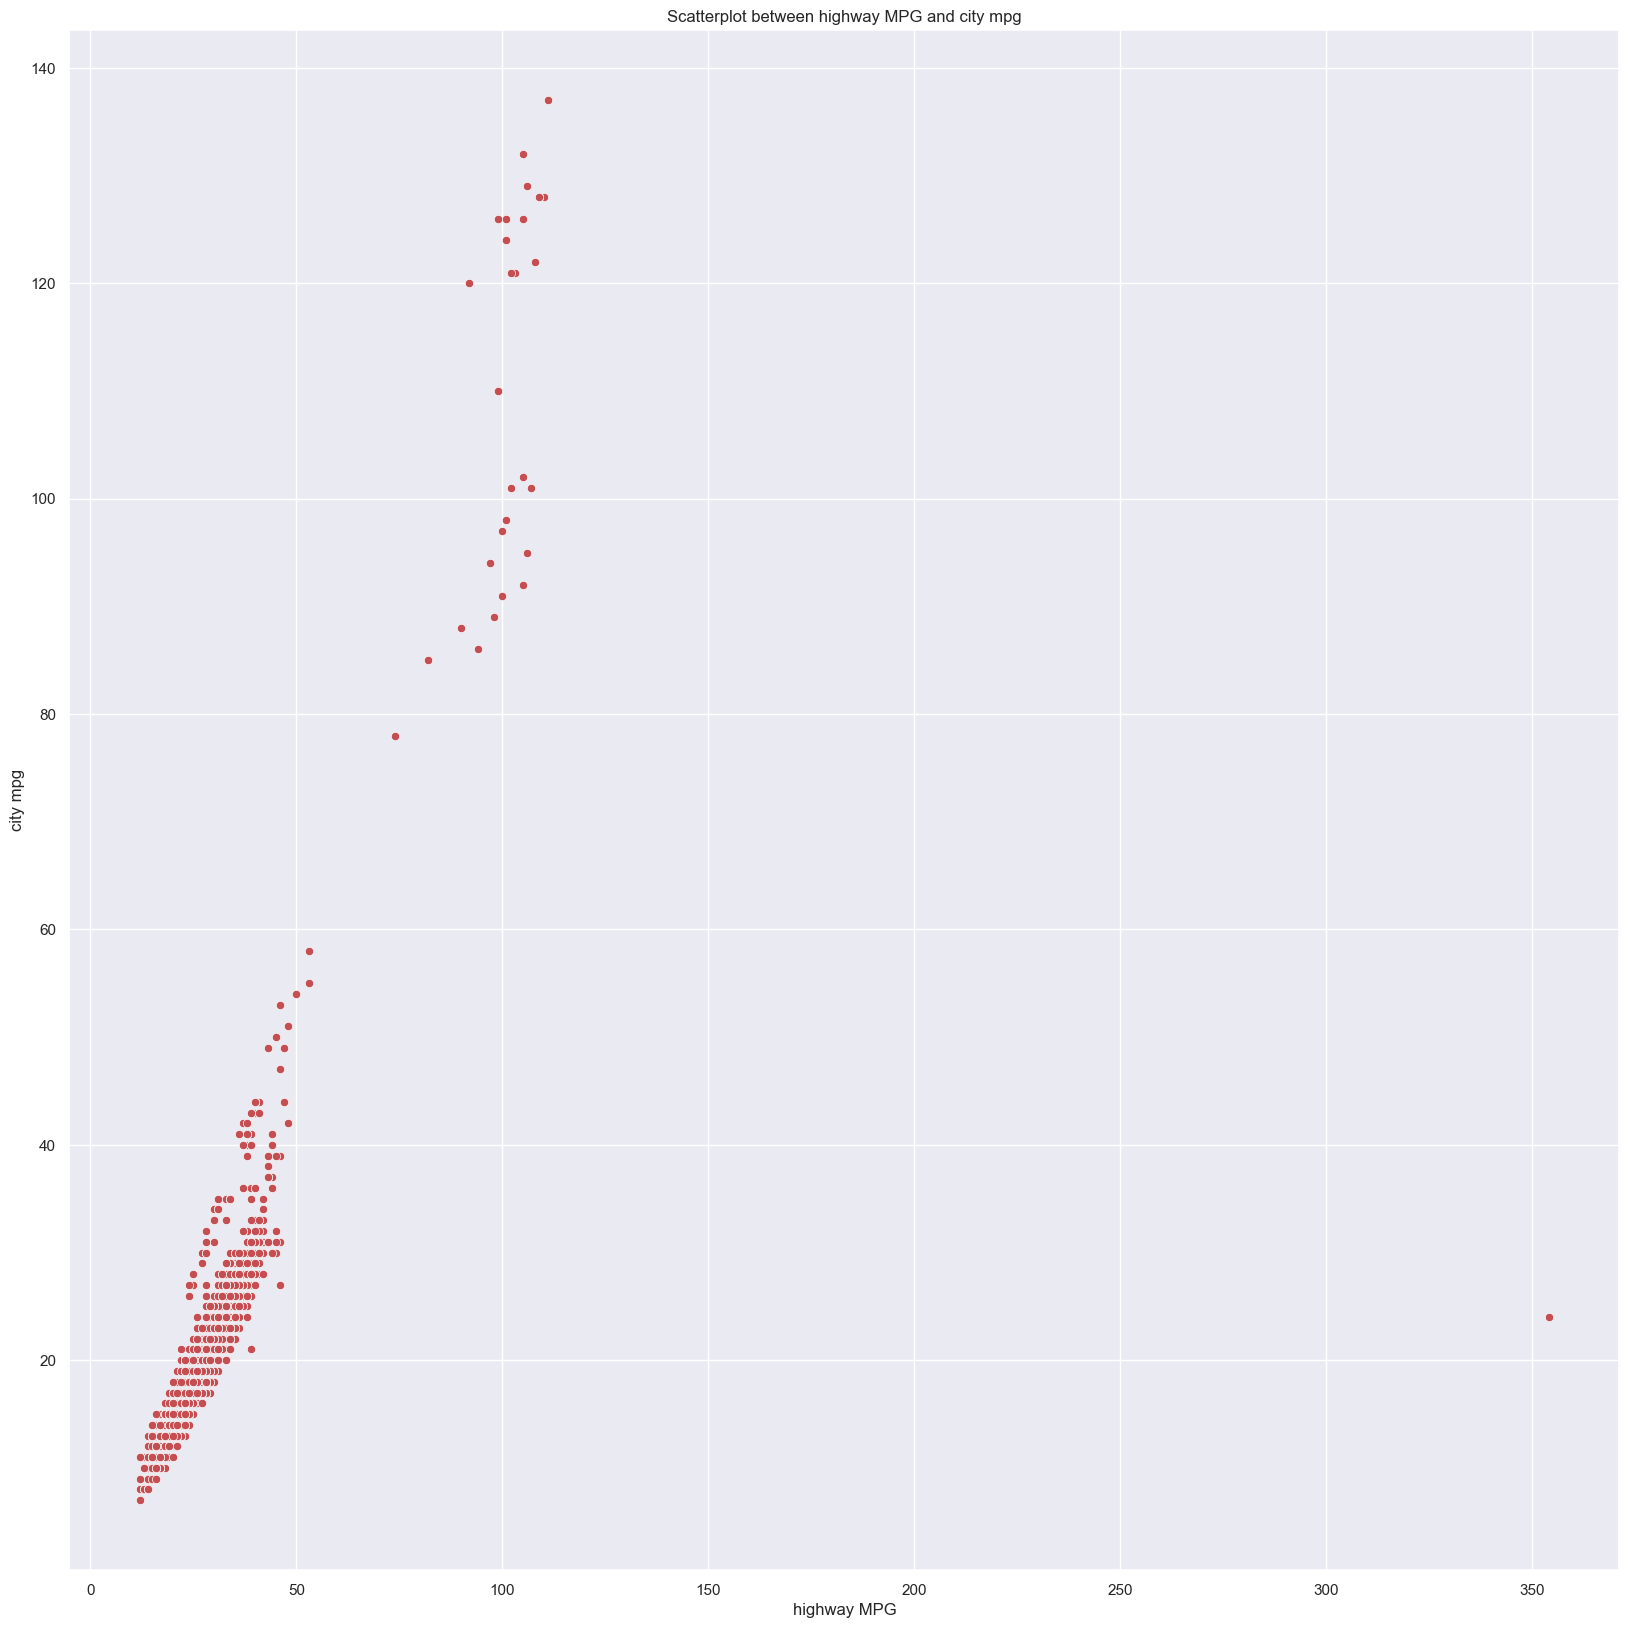

In [1017]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

We will proceed to remove the outlier in our data that the highway MPG is about 350.

In [1018]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [1019]:
data = data[data['highway MPG'] < 350]

After removing the outlier we will use the scatterplot same as the above. We should expect a almost linear line between the two varaibles that we are considering and it shows below correctly.

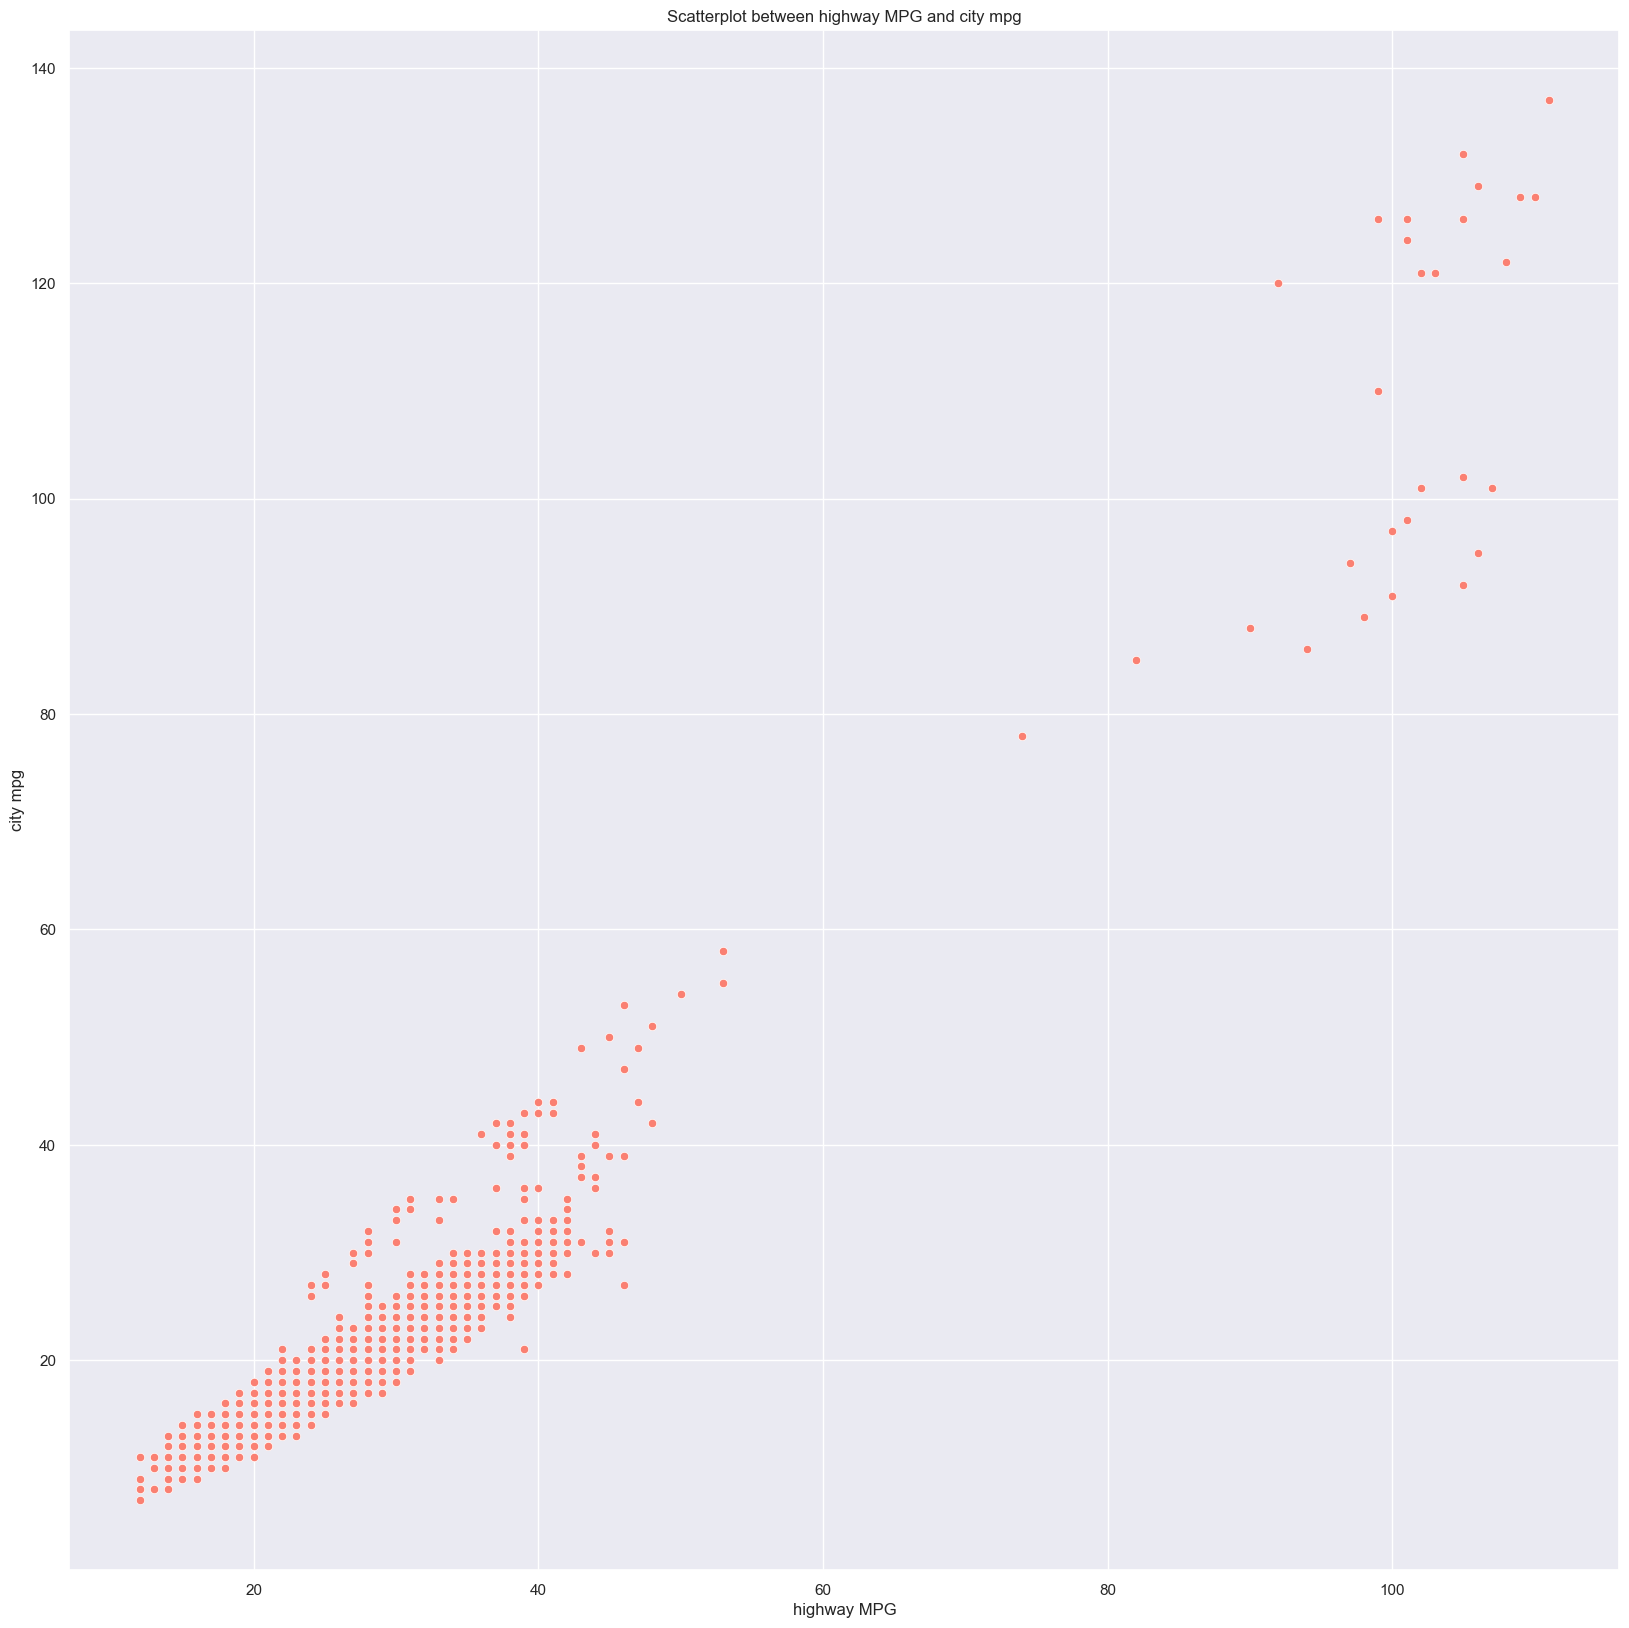

In [1020]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

## 2.5 Boxplot 

We want to use Boxplots as it gives us a good insight of how the data values for different variables are spread out, how much percentile is the data most concentrated in. Example, we could get to know the 25th, 50th and 75th percentile values present in different variables. In addition, we can detect the outliers by making use of the boxplot and considering the interquartile range which is the difference between the 75th percentile and 25th percentile respectively.

## 2.5.1 Boxplot of highway MPG

Below is the boxplot for highway MPG and how the distribution is spread. We see that the average values are 25 for highway MPG and the maximum value beingg equal to around 40 and the points above 40 are considered outliers. We see that the distribution of data is quite compact as it only spread from 21 to 30 roughly.

<Axes: xlabel='highway MPG'>

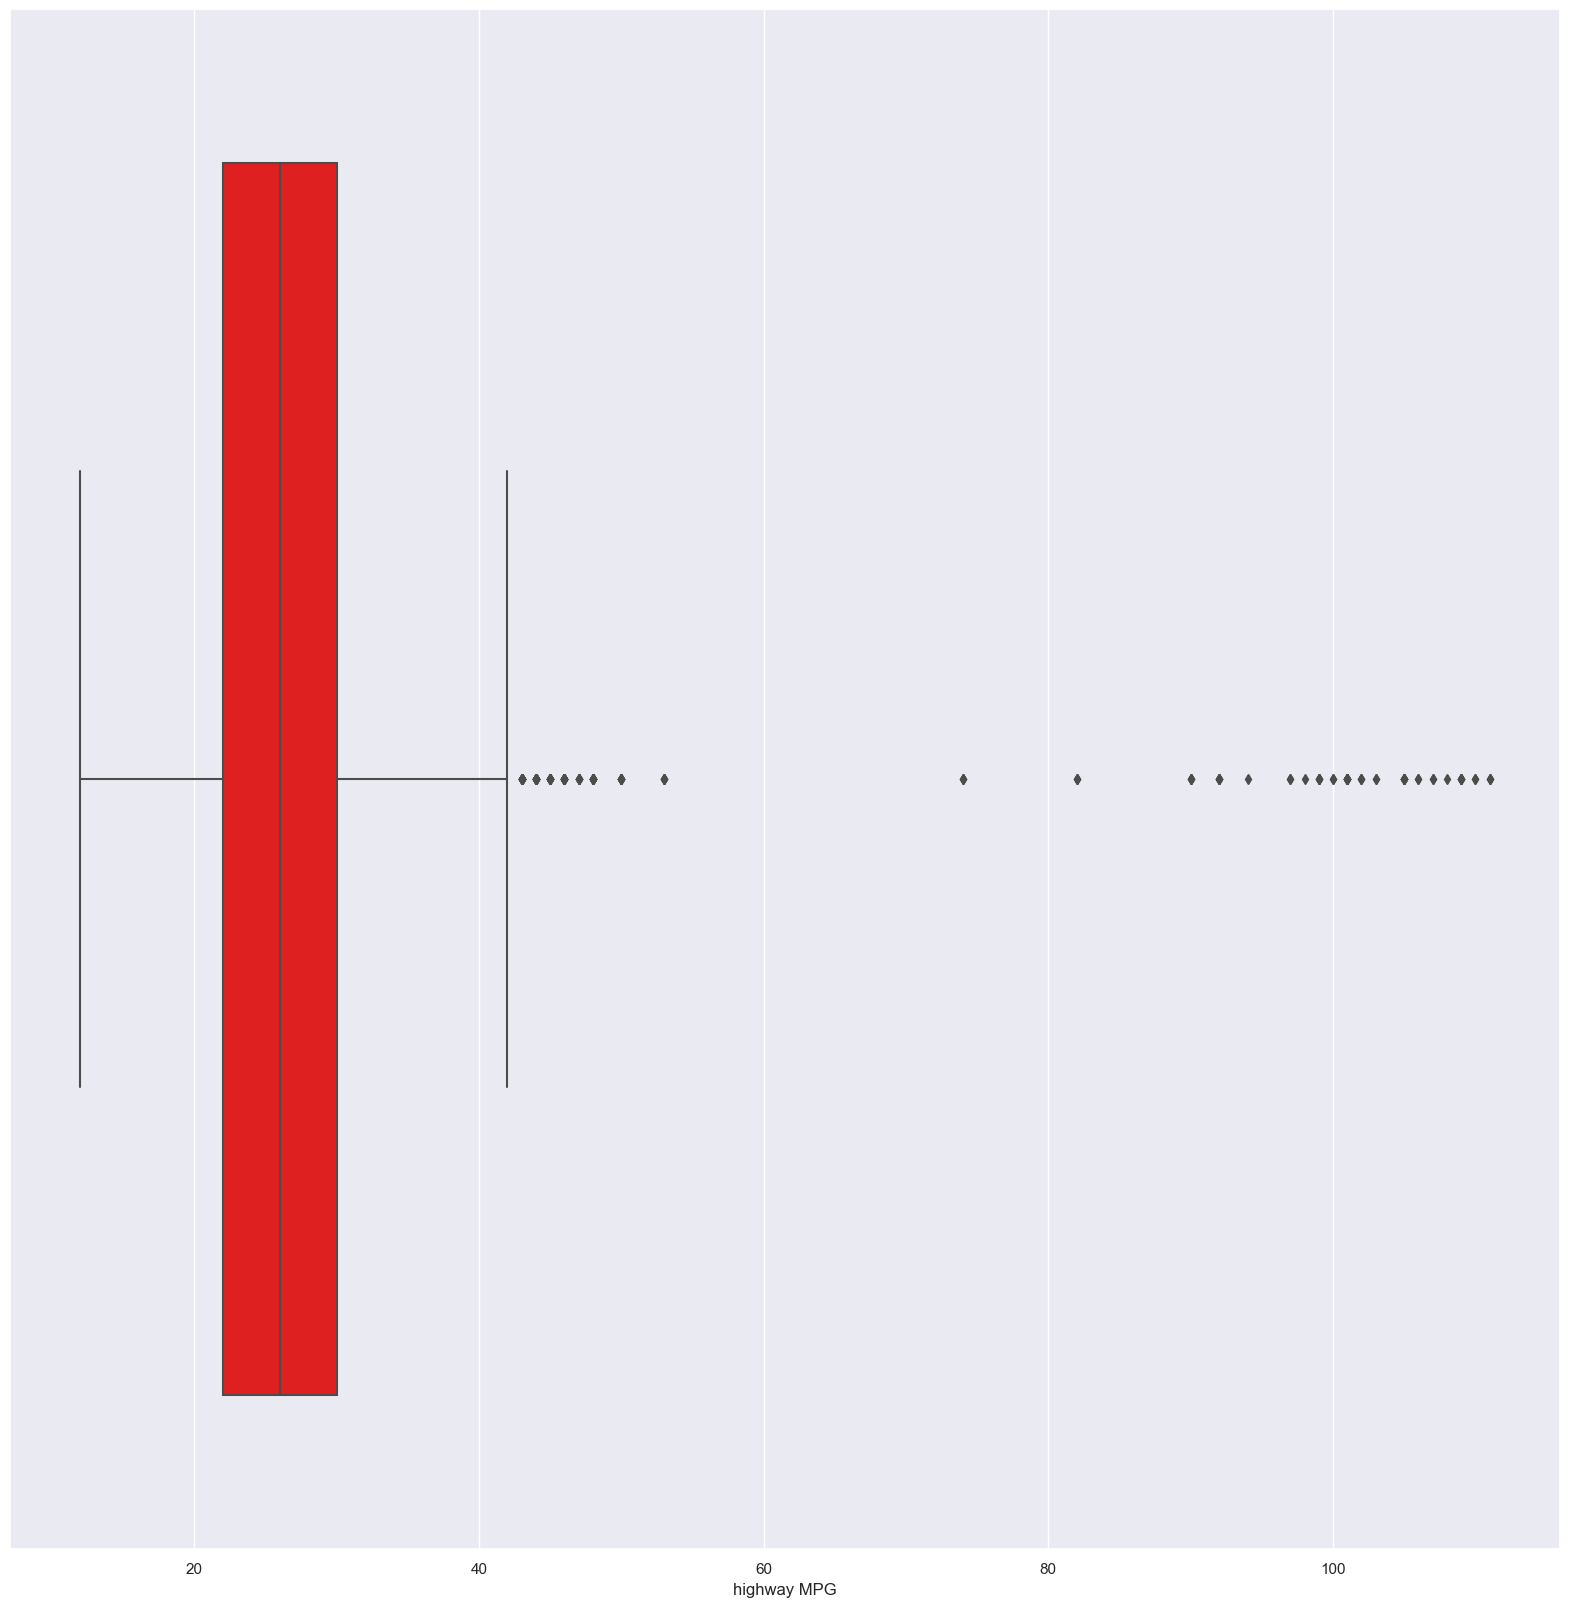

In [1021]:
sns.boxplot(x = 'highway MPG', data = data, color = 'red')

## Calculating percentiles of highway MPG

We want to print out the highway percentile values from 90th percentile onwards to 100th percentile, then we can show which is the outlier.

In [1022]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


Below, we can focus on seeing that 99.5th percentile values and so on have very high values and all of this we can consider them as outliers. Therefore, we need to remove those outliers so that they do not affect our machine learning algorithms, and the machine learning will. be able to perform well with the data once we remove the outliers.

In [1023]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


Below we remove the outliers by setting the limit to equal to around 60 so that above this 60 value will be remove. 

In [1024]:
data = data[data['highway MPG'] < 60]

We want to then plot the boxplot again to see how the values are split for highway MPG and make sure that the outliers are not considered. We will also see clearly that the highway MPG is more skewed towards to right and alot of values to the right of the mean. What we can infer is that more than 50 percent of the values are above the mean. 

<Axes: xlabel='highway MPG'>

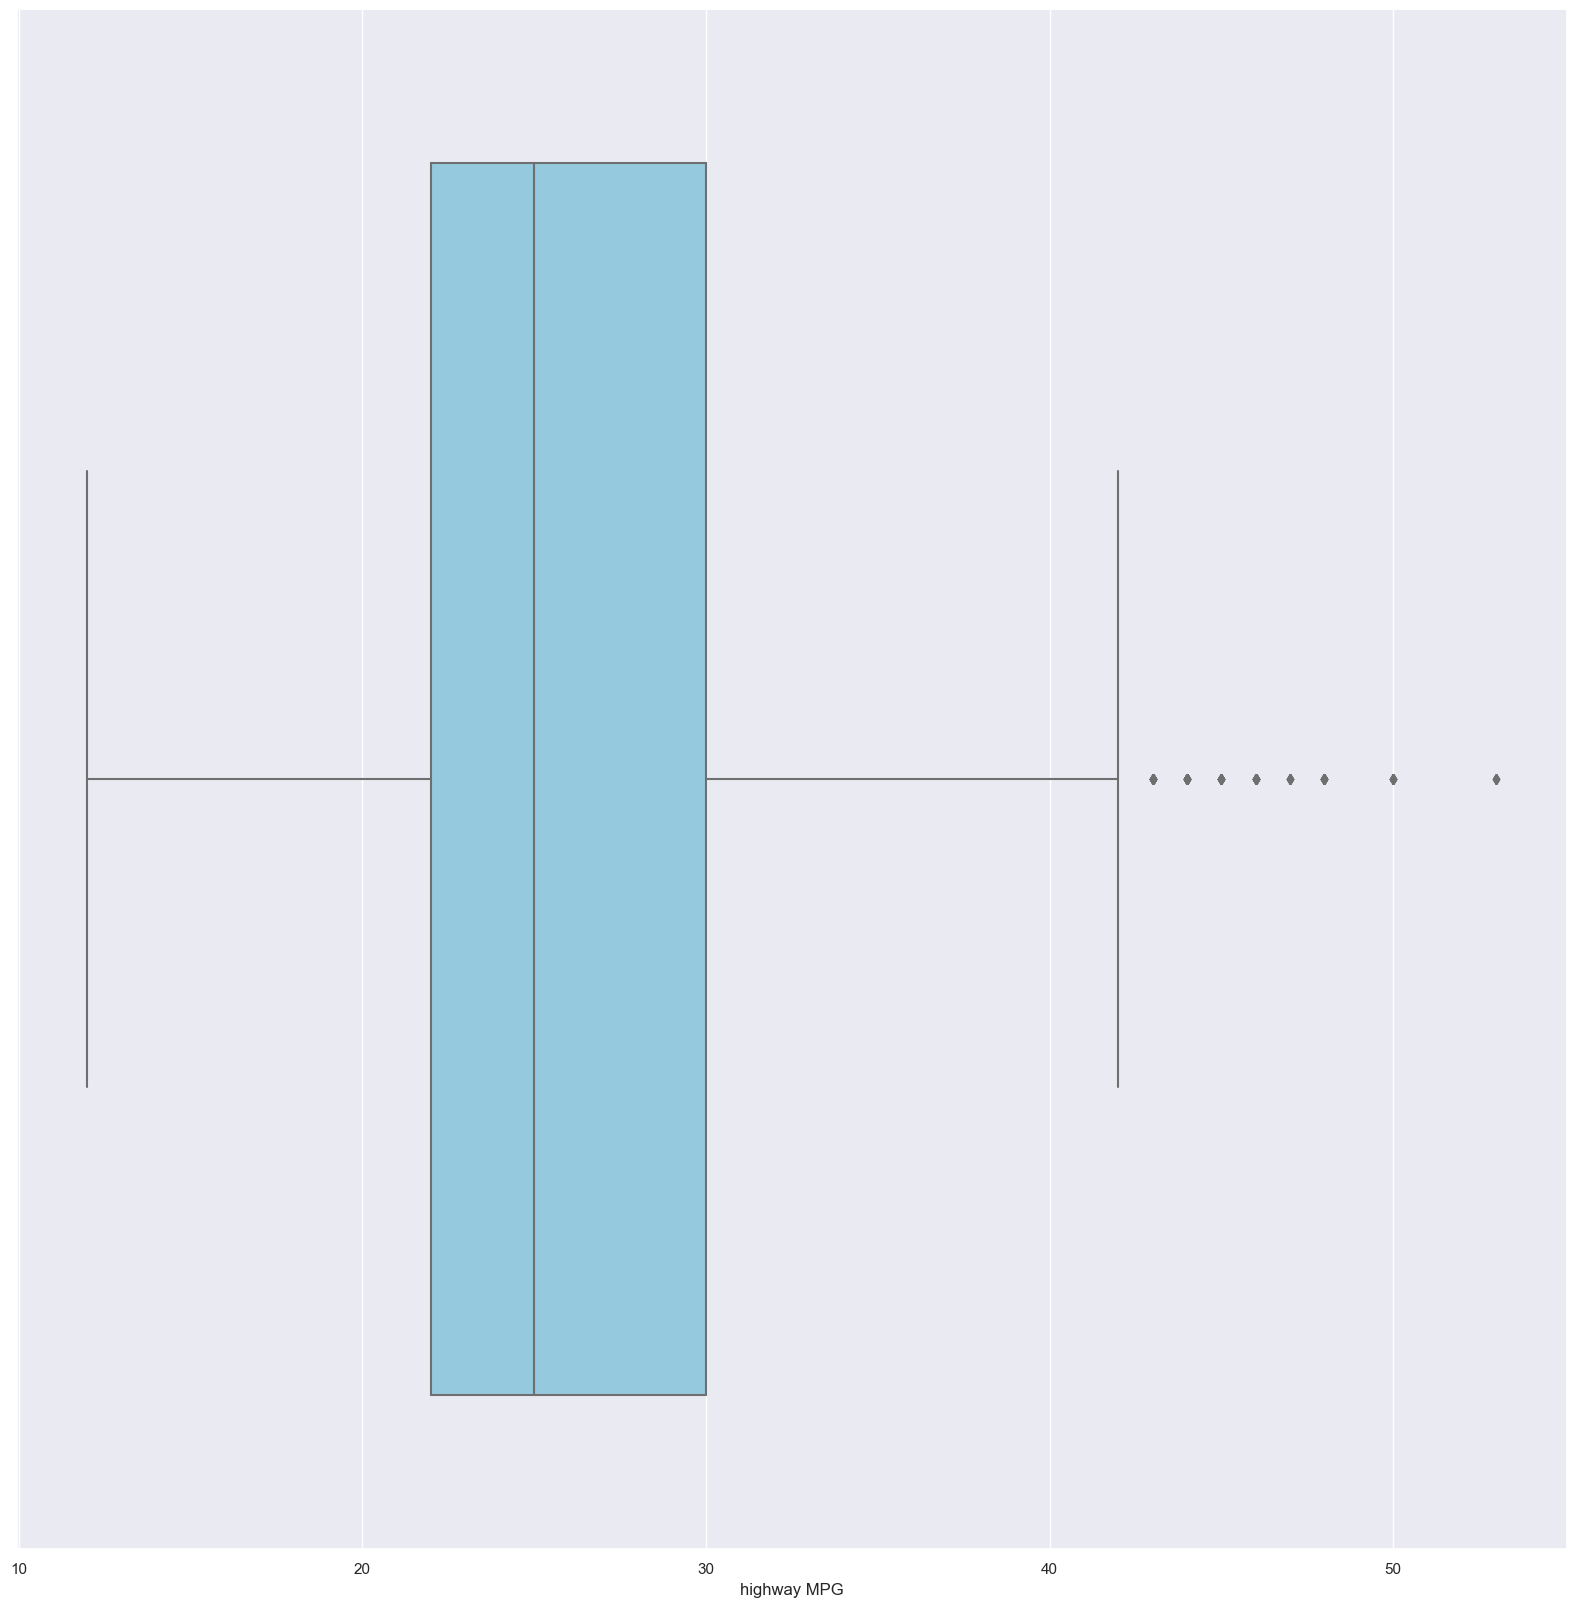

In [1025]:
sns.boxplot(x = 'highway MPG', data = data, color = 'red')

## 2.5.2 Boxplot of city mpg
We also want to repeat the same operation for 'city mpg' and we see below some outliers that might interfere in our predictions. Therefore, we will delete those values by limiting the range shown. 


<Axes: xlabel='city mpg'>

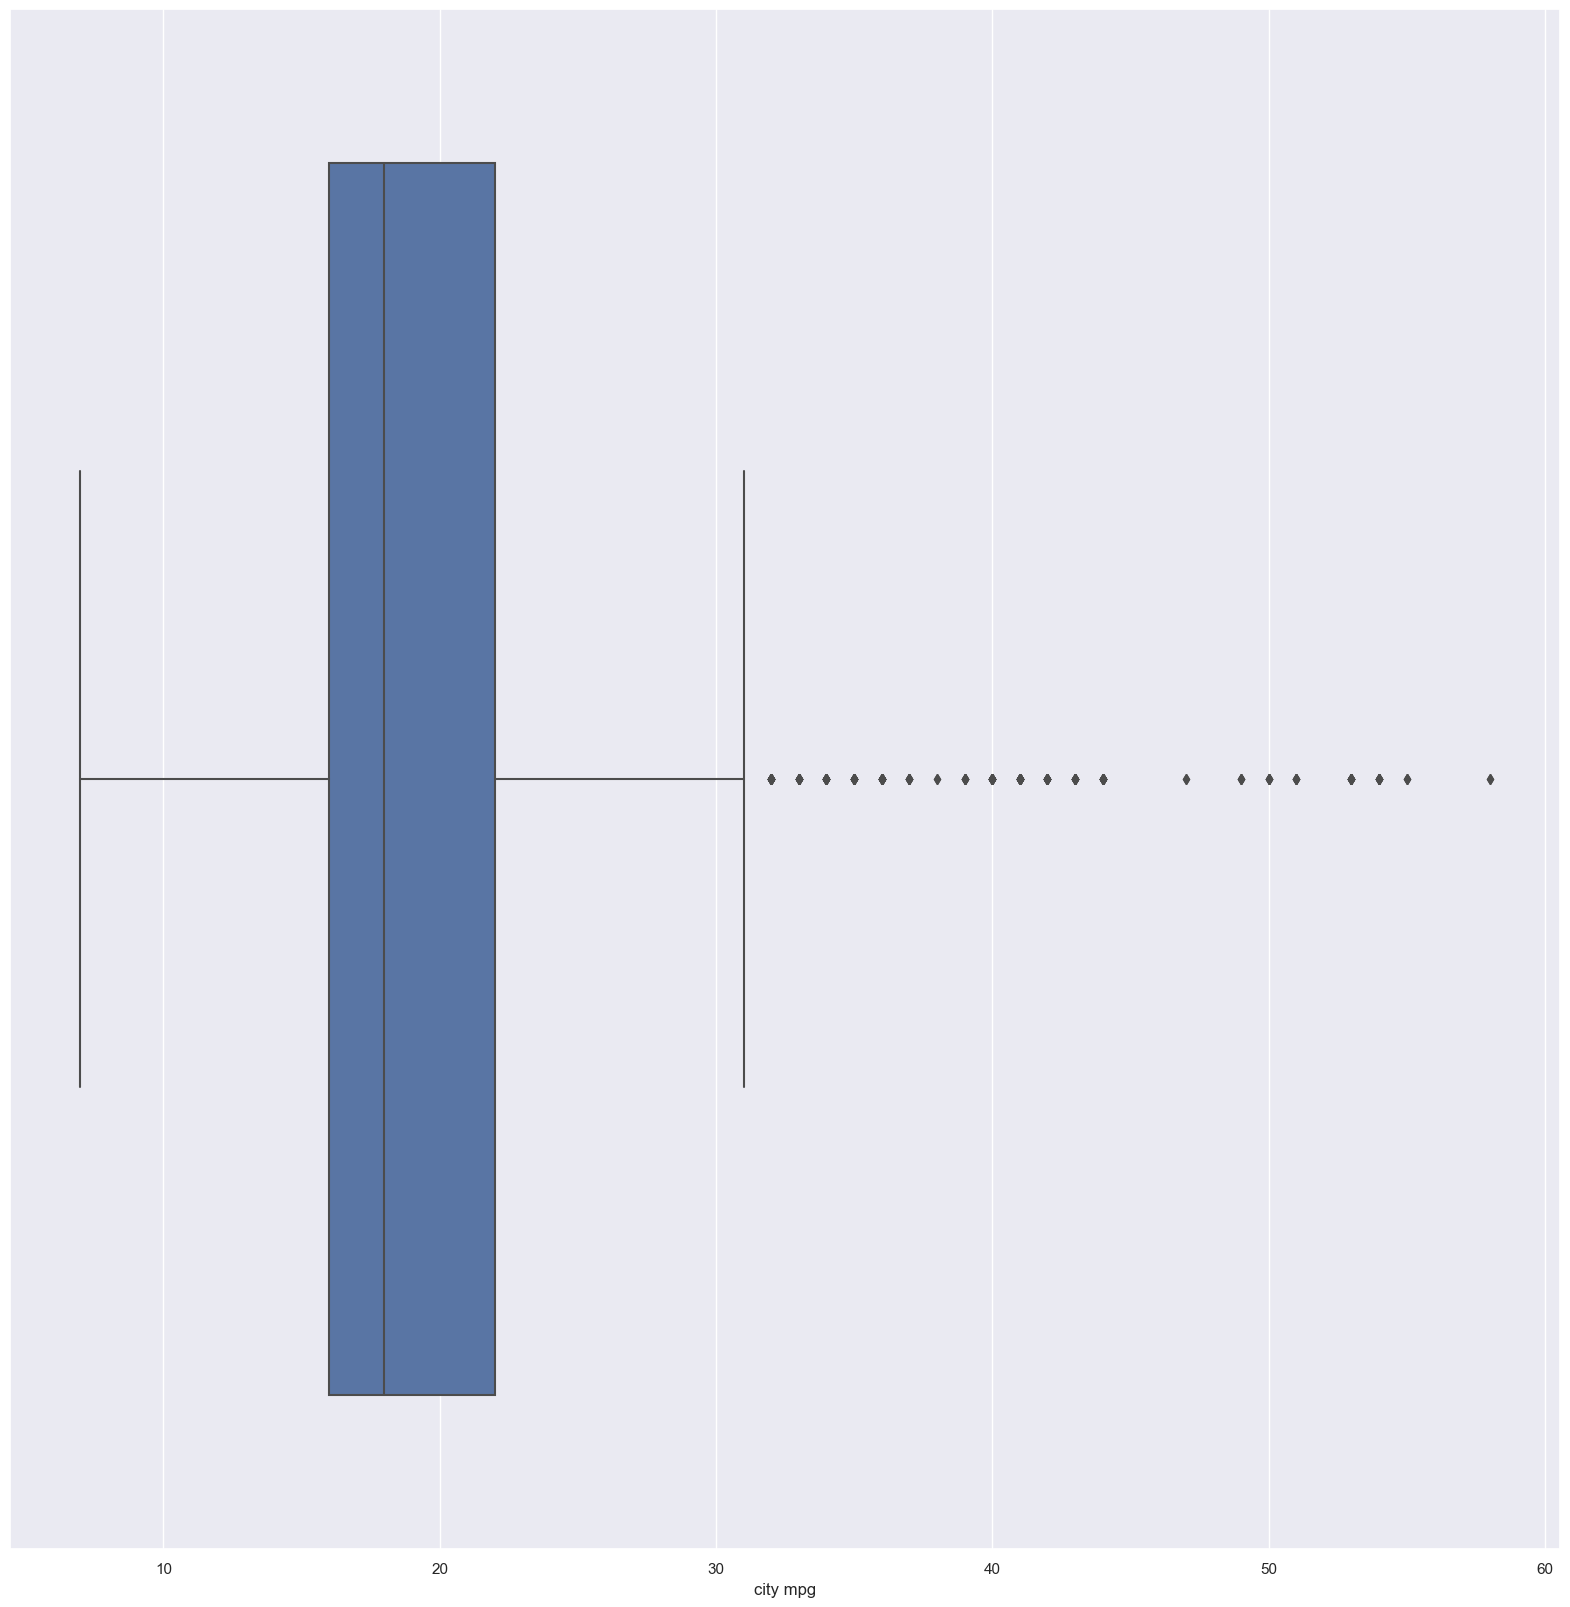

In [1026]:
sns.boxplot(x = 'city mpg', data = data)

## Calculating percentiles of city MPG

We want to print out the city MPG percentile values from 90th percentile onwards to 100th percentile, then we can show which is the outlier.

In [1027]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


Below, we can focus on seeing that 99.5th percentile values and so on have very high values and all of this we can consider them as outliers. Therefore, we need to remove those outliers so that they do not affect our machine learning algorithms, and the machine learning will. be able to perform well with the data once we remove the outliers.

In [1028]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


Below we remove the outliers by setting the limit to equal to around 40 so that above this 40 value will be remove.

In [1029]:
data = data[data['city mpg'] < 40]

We want to then plot the boxplot again to see how the values are split for city MPG and make sure that the outliers are not considered. We will also see clearly that the city MPG is more skewed towards to right and alot of values to the right of the mean. What we can infer is that more than 50 percent of the values are above the mean. 

<Axes: xlabel='city mpg'>

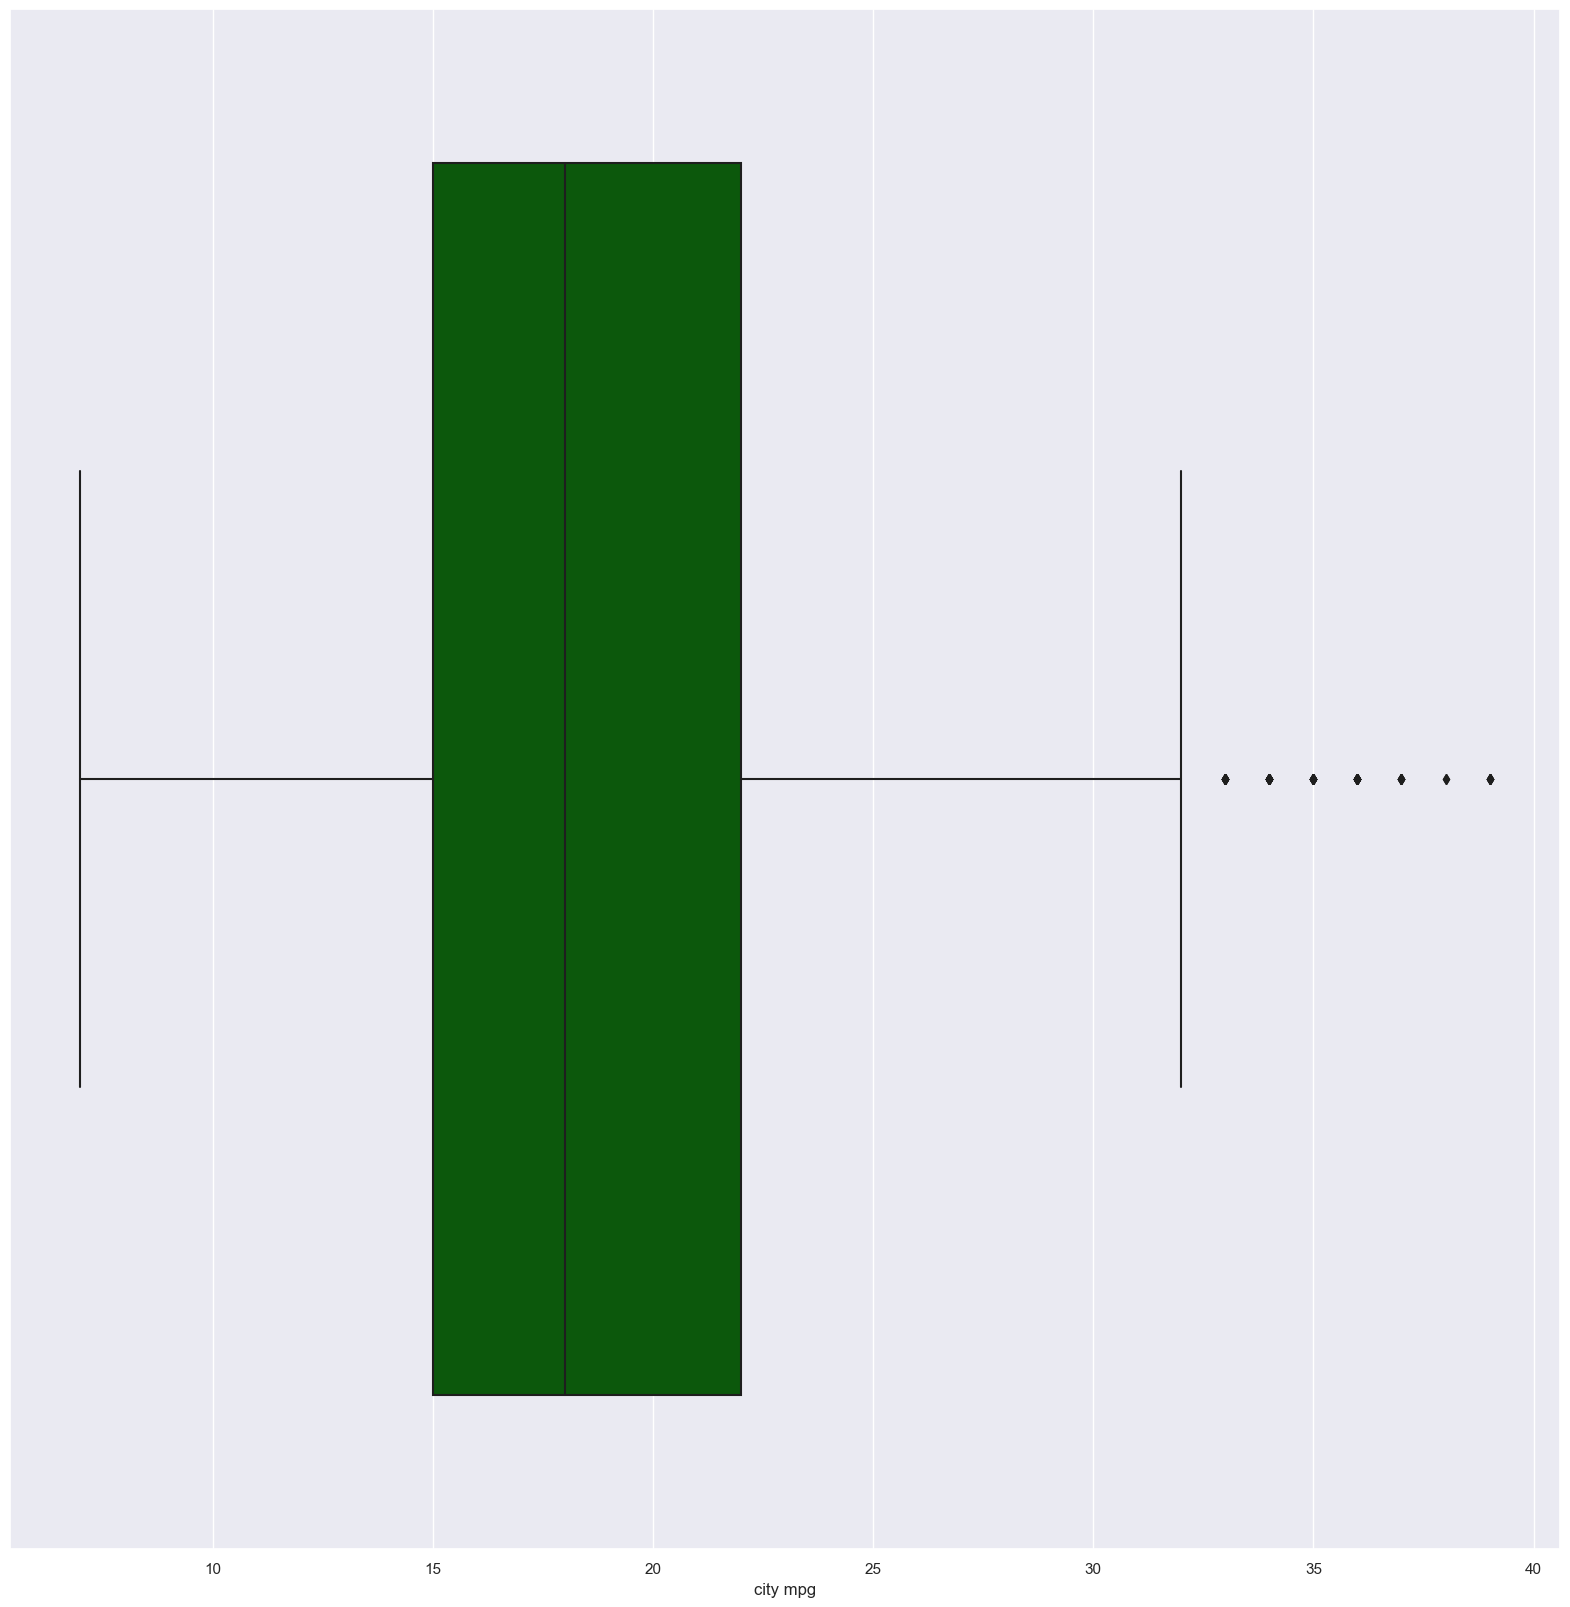

In [1030]:
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')

## 2.5.3 Boxplot of 2 features 'city mpg' and 'highway MPG' 

We want to then compare the 2 variables 'city mpg' and 'highway MPG' side by side. We see that in terms of 'city mpg' most of the values that are present are in the range between 15 to 22 respectively. While in terms of 'highway MPG', we find that most of the values that are present are in the range 22 to 30 respectively. Therefore, we can see how the values are spread in the boxplot.

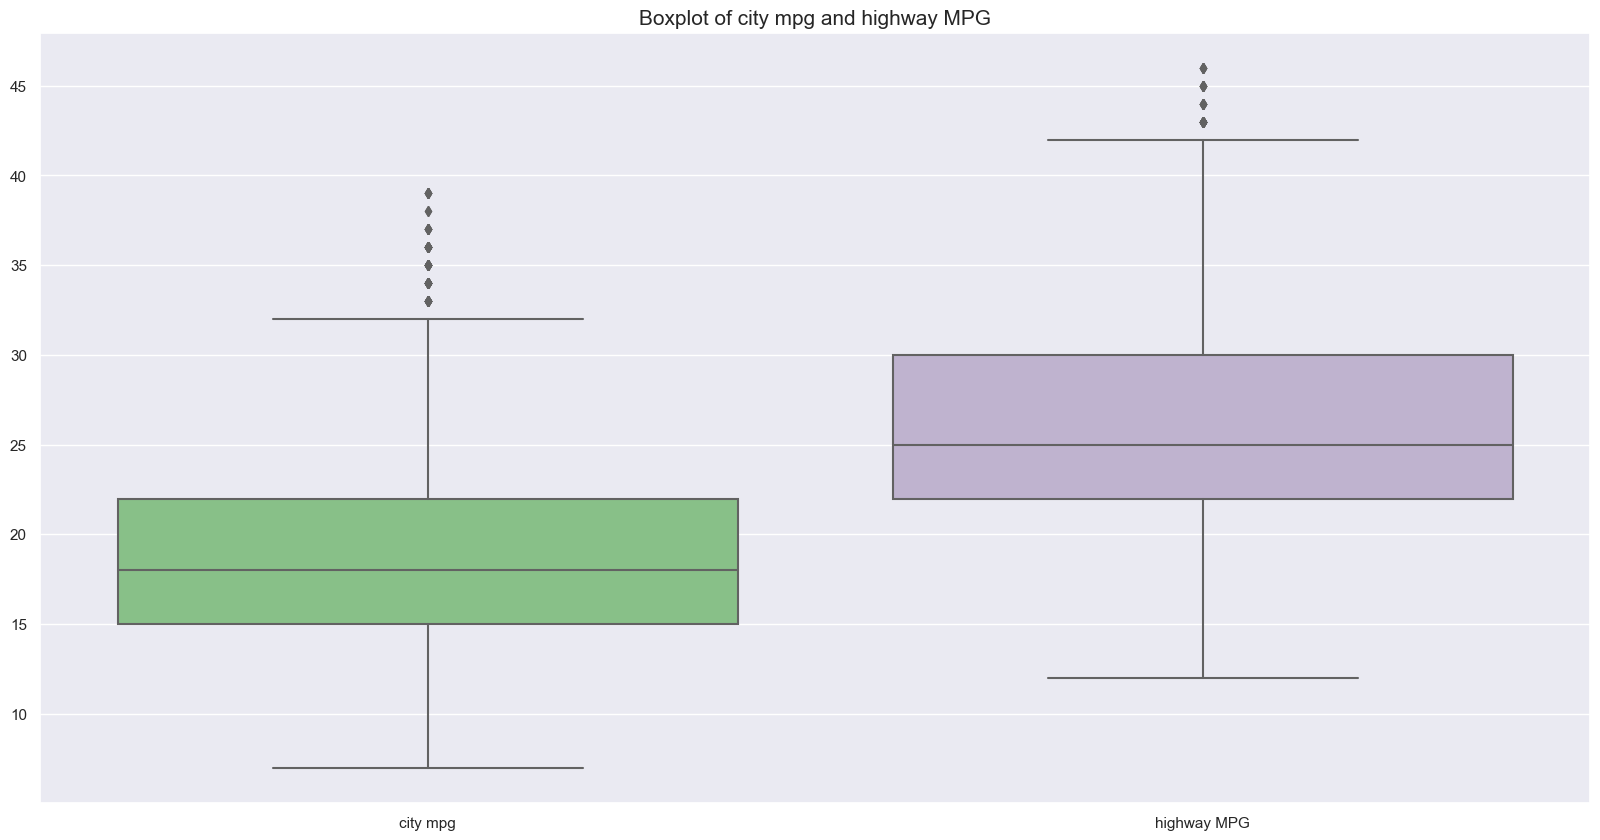

In [1031]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

## 2.5.4 Boxplot of 'Engine HP' 

We want to check the boxplot of 'Engine HP' below and see the spread of the values. We see that most of the values of 'Engine HP' lie between 150 to 300 respectively. The maximum value of the engine horsepower will be something like 500 while the remaining values that are higher can consider them to be outliers. The boxplot also looks as though it is right skewed where there are more number of values of 'Engine HP' that are higher than the mean value of about 250 (mean). 

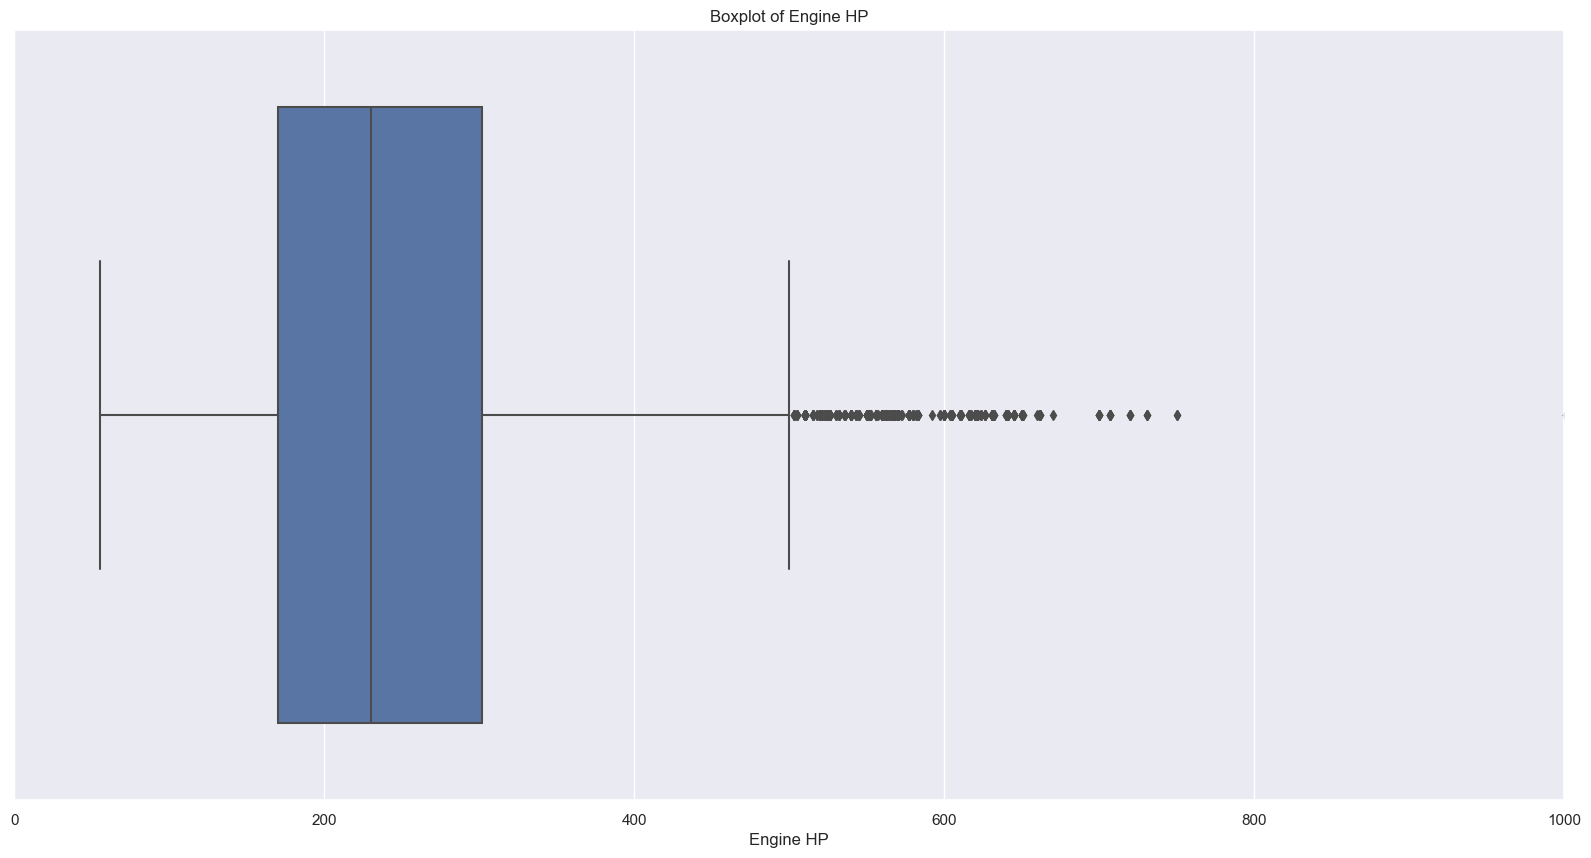

In [1032]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=data['Engine HP'])
plt.title("Boxplot of Engine HP")
plt.xlabel('Engine HP')
plt.xlim(0, 1000)  # Adjust the limits as needed to capture the bulk of the data
plt.show()

## 2.6 Heatmap of all the variables

We want to then use heatmap in python, we can consider all the important features of the car and how they relate to each other. We see that 'highway MPG' and 'city mpg' are highly related, with the value of 0.94. While also 'Engine HP' and 'Engine Cyliners' are also correlated 0.78. This correlation are important as it validates whether the data is true in our dataset. In the car industry, and above when we plot the scatterplot of 'highway MPG' and 'ciy mpg' we know that both must be related and they cannot differ, additionally for 'Engine HP' and 'Engine Cylinders' they are correlated as having higher number of cylinders will relate to higher number of horsepower in the car industry. 

<Axes: >

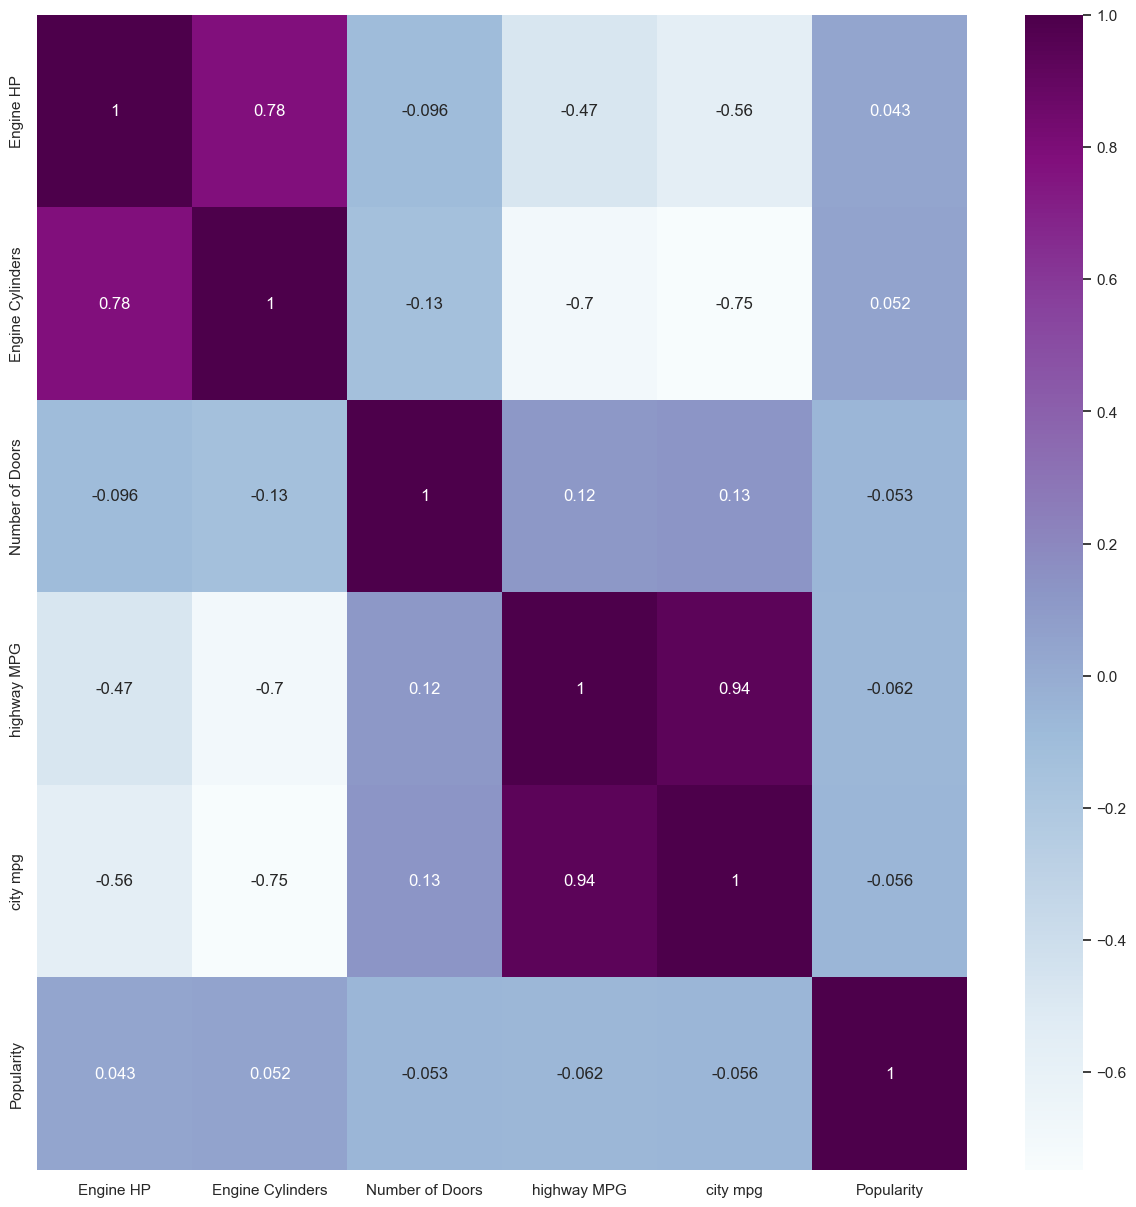

In [1033]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

## 2.7 Checking the NULL values

We will then check for NULL (empty) values and see which variables have missing values. If we cannot fill them up to fix them we have to consider to drop the variable as the machine learning cannot take into account the missing values. We see some variables such as 'Engine Fuel Type' and 'Engine HP', 'Engine Cylinders', 'Number of Doors' and 'Market Category' that are missing. Although there are some algorithms that can make the machine learning work with the missing values, we will consider that the machine learning model cannot take in missing values so we need to ensure there is not missing values in our variables.

## 2.7.1 Make Number of Doors have 0 missing values 

In [1034]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

We want to calculate the median value as it can be represented better than mean of the dataset so we can fill the missing values with the median value.

In [1035]:
data['Number of Doors'].median()

4.0

Here, we will be filling the missing values with the value 4 as calculated earlier which is the median of the number of doors. 

In [1036]:
data['Number of Doors'].fillna(4.0, inplace = True)

We will now check again if there are any missing values for 'Number of Doors' to verify whether we have done it correctly. Now we can see that there are 0 missing values present for 'Number of Doors'.

In [1037]:
data['Number of Doors'].isnull().sum()

0

In [1038]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## 2.8 Creating a new column for Present Year

We want to now add a new column for the 'Present Year' which is used to calculate the difference between the present year and te year of manufacture of the car. This is so that we can take into consideration of the depreciation amount which can be done by the machine learning models. Therefore we create a new column called 'Present Year' and make it equal to this year, 2024. We then subtract the 'Present Year' with 'Year of Manufacture to get the total number of years the car has been out.

In [1039]:
data['Present Year'] = 2024

We will then print out the dataframe head to check the values that are present in it before we make the adjustments planned. 

In [1040]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2024
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2024
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2024
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2024
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2024


Now we can create a new column called 'Years of Manufacture' respectively. We will be doing the subtraction of the 'Present Year' from the 'Year' which is the year of manufacture. It will be better to plot the graph and see how the graph looks like in the notebook.

In [1041]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

Once we have the information for the years that the car is out, there is no need to have an additional column called 'Present Year' as that value is a constant. We will, therefore, drop the column that we created, as it is no longer needed. 

In [1042]:
data.drop(['Present Year'], inplace = True, axis = 1)

## 2.9 Plotting the barplot of 'Years of Manufacture' 

We want to plot out the bar plot for the years that is out for the cars, we can see that most of the values are about 9 years old. Therefore, we are working with young cars as there are some other cars in our data that are about 34 years old. These cars are very few in number. This is a good indication as the current data set is not old and we can use it as reference for future prediction of car retail price.

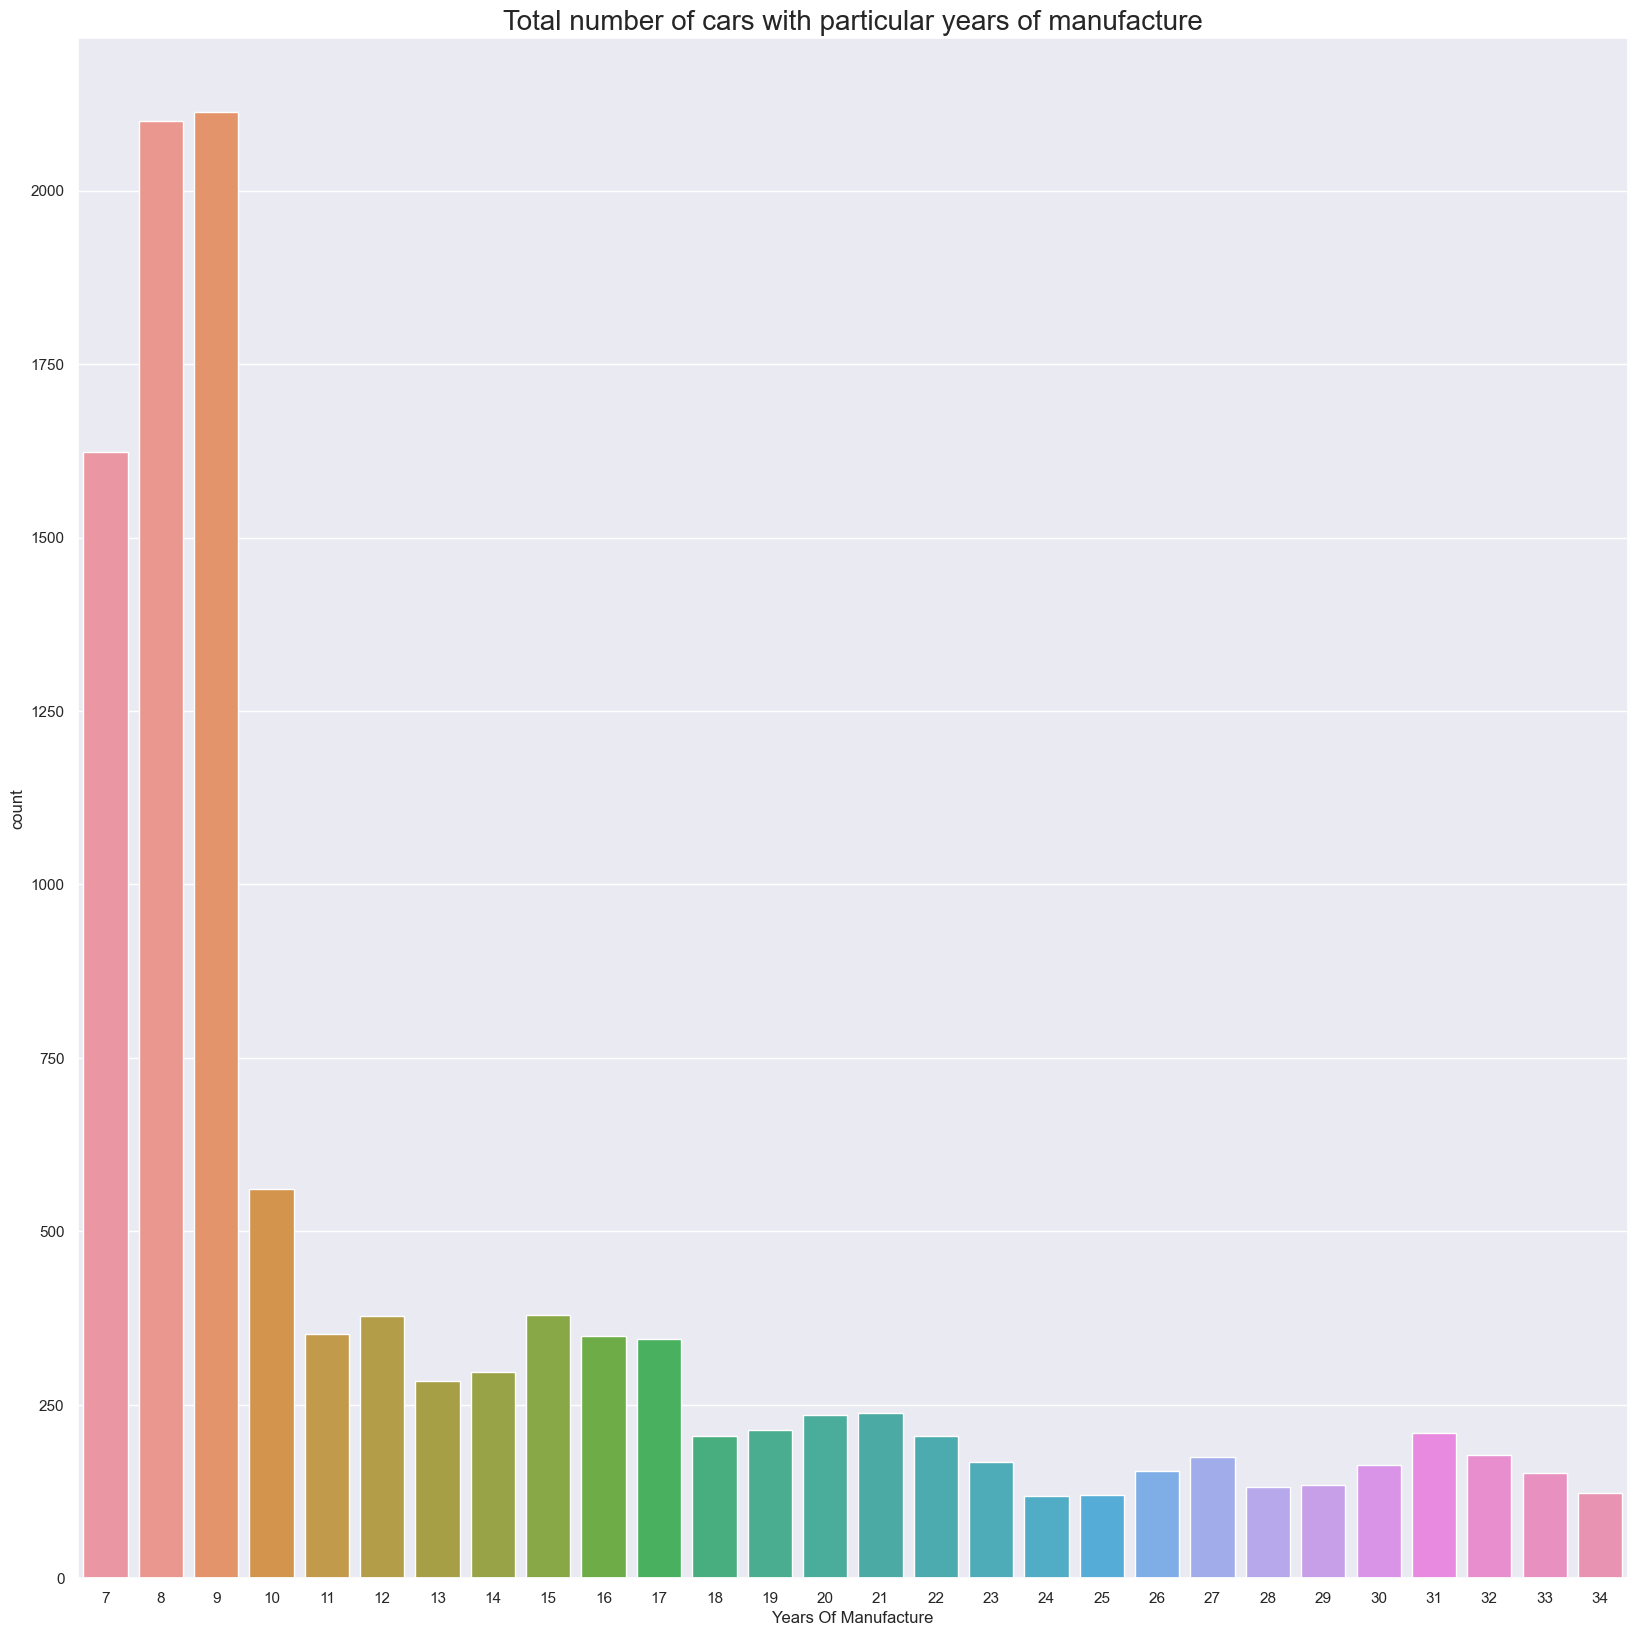

In [1043]:
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

## 2.7 Checking the NULL values 


## 2.7.2 Make Engine Fuel Type have 0 missing values 
Unique values in 'Engine Fuel Type'

We see that there are a few values that are present in 'Engine Fuel Types' same as before for the 'Number of doors, we will proceed to make all of these values below for missing values to indicate 0 so that we know our machine learning will not take into account the missing values.

In [1044]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           3
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [1045]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [1046]:
type("data['Engine Fuel Type'].mode()")

str

In [1047]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [1048]:
data['Engine Fuel Type'].isnull().sum()

0

In [1049]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

## 2.7.3 Make Engine HP have 0 missing values 


We will now be calculating the mean value of 'Engine HP'. As we can see from the graph, the 'Engine HP' is about 250.

In [1050]:
data['Engine HP'].mean()

250.75316672372475

We want to then check the median values of 'Engine HP'. We see that the value is about '230'.

In [1051]:
data['Engine HP'].median()

230.0

We will then fill up the missing values with the median value so that it is more appropriate and represent the data compared to mean as we mentioned earlier with the 'Number of Doors'. And we have to make sure that we indicate inplace = True which means that the values that are replaced are permanent rather than getting temporary solutions in a variable. 

In [1052]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)

We will then verify and check the missing values in 'Engine HP' and see if there is still any missing values present. We see that there are no mssing values that are present in 'Engine HP' which is correctly done before. 

In [1053]:
data['Engine HP'].isnull().sum()

0

In [1054]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

## 2.7.4 Make Engine Cylinders have 0 missing values 


We can now proceed on to check for missing values in 'Engine Cylinders' and see if there is any need for replacement. We see that there is an 'nan' value present in our data. We have to remove that point and as again missing values in machine learning could lead to some errors.

In [1055]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

In [1056]:
data['Engine Cylinders'].fillna(4, inplace = True)

## 2.7.5 Dropping Market Category as there is too many missing values 


We will see that there is still one variable but it has alot of missing values of 3737. It seems also that the variable has complex text, categorical variable and it needs to use natural language processing techniques (NLP) to address this issue. We will not use NLP so we will just drop the variable 'Market Category'.

In [1057]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [1058]:
data['Market Category'].unique()


array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance', 'Hybrid',
   

Below we proceed to drop the 'Market Category' variablem we need to indicate the inplace = True which shows that the feature is permanently removed. 

In [1059]:
data.drop(['Market Category'], inplace = True, axis = 1)

We once again check the missing values in our data. We can see below that there are no missing values in our features. Now what we need to do is to change all the categorical variables to numerical format for the machine learning to use and predict the retail price.

In [1060]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

## 2.10 Checking data variables for non integer values



We want to check the dataset for variables that are non integer values as we mention earlier about categorical, we need to address all these variables that have data type object and make it to numerical int64 type for machine learning to learn the data.

In [1061]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11705 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11705 non-null  object 
 1   Model                 11705 non-null  object 
 2   Year                  11705 non-null  int64  
 3   Engine Fuel Type      11705 non-null  object 
 4   Engine HP             11705 non-null  float64
 5   Engine Cylinders      11705 non-null  float64
 6   Transmission Type     11705 non-null  object 
 7   Driven_Wheels         11705 non-null  object 
 8   Number of Doors       11705 non-null  float64
 9   Vehicle Size          11705 non-null  object 
 10  Vehicle Style         11705 non-null  object 
 11  highway MPG           11705 non-null  int64  
 12  city mpg              11705 non-null  int64  
 13  Popularity            11705 non-null  int64  
 14  MSRP                  11705 non-null  int64  
 15  Years Of Manufacture  11

Below we can see that the unique values of 'Vehicle Size' and see the values that are associated with them. We see just 3 categorical features such as 'Compact', 'Midsize' and 'Large' respectively. 

In [1062]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

Below we can also see that the unique values of 'Vehicle Style', 'Transmission Type', 'Driven_Wheels', 'Make', 'Model', and 'Engine Fuel Type' and see the values that are associated with them. We see just alot of categorical variables. 

In [1063]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [1064]:
data['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN'], dtype=object)

In [1065]:
data['Driven_Wheels'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [1066]:
data['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Aston Martin', 'Land Rover', 'Lotus',
       'Lexus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Bugatti'],
      dtype=object)

In [1067]:
data['Model'].unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500', '500L', '500X', '550', '560-Class',
       '570S', '575M', '57', '599', '5', '6 Series Gran Coupe',
       '6 Series', '600-Class', '6000', '612 Scaglietti', '626', '62',
       '650S Coupe', '650S Spider', '6', '7 Series', '718 Cayman', '740',
       '760', '780', '8 Series', '80', '850', '86', '9-2X', '9-3 Griffin',
       '9-3', '9-4X', '9-5', '9-7X', '9000', '900', '90', '911', '928',
       '929', '940', '944', '960', '968', 'A3', 'A4 allroad', 'A4', 'A5',
       'A6', 'A7', 'A8', 'Acadia Limited', 'Acadia', 'Accent', 'Acclaim',
       'Accor

In [1068]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)',
       "data['Engine Fuel Type'].mode()"], dtype=object)

# 3. Manipulation of Data 

Here we want to manipulate the data by changing the categorical format to numerical for machine learning models to predice. We want to use various libraries in python such as shuffle that are used to choose various data values that will later be given to the machine learning models. We also need to encode the text information that is present so that those values are converted to numerical that will ensure that they will be understood by machine learning later. 

## 3.1 Shuffling the data

This time we want to shuffle the data randomly so that we get outputs differently and we will be dealing with data without any particular order or a particular timeframe. 

In [1069]:
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

## 3.2 Dividing the data into training and testing set

We want to divide our data into training data and testing data. Since we have a lot of data points, it will be better to randomly divide the data so that the test set just contains 20 percent of the values. Since the total number of data points that we have taken into consideration are about 10000, it will be good to divide the training and testing set in the ratio 80:20 percent. In general, we will be diving the training and testing set so that the value that is present in the training set is about 80 percent of the total data. 

In [1070]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

We want to print out the format of data to see how the values are separated into two set. We can see that the total number of rows on the training set are about 9364 respectively, while for the test set are about 2341 respectively. These values can be seen here. 

In [1071]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (9364, 15)
The size of the output train data is: (9364,)
The size of the input test data is: (2341, 15)
The size of the output test data is: (2341,)


## 3.3 Encoding the data

Before we start to do any machine learning applications, it is important to encode the data so that we will be able to convert the data in the form of categorical so that we will be working on the data that is numerical rather than categorical. 

## 3.3.1 Encoding the Year column


In [1072]:
encoder = TargetEncoder(cols = 'Year')

In [1073]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,2003,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,Saab,900,1997,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,Chevrolet,C/K 1500 Series,1997,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,Aston Martin,V8 Vantage,2015,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,Honda,Civic,2015,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


We will be doing the target encoding here where we will replace the values with the average values of the 'MSRP' whenever we find a value associated with it. This way makes it easier for the machine learning model as we are already giving the output values to it so that there is no need to encode further. 

In [1074]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )


TargetEncoder(cols=['Year'])

We want to transform the value so that we are now converting the column so that we get the most desired output respectively. 

In [1075]:
X_train['Year'] = encoder.transform(X_train['Year'])


We should also make sure that the values that we have taken into consideration and transforming should be with respect to the training set not the test set.

In [1076]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [1077]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,Saab,900,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,Chevrolet,C/K 1500 Series,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,Aston Martin,V8 Vantage,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,Honda,Civic,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


## 3.3.2 Encoding the Model Column


In [1078]:
# Initialize the encoder
encoder = TargetEncoder(cols='Model')

# Fit the encoder on the training set
encoder.fit(X_train['Model'], y_train)

# Transform both the training and the test sets
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

In [1079]:
# Fit the encoder on the training set
encoder.fit(X_train['Model'], y_train)  # y_train is assumed to be a Series



TargetEncoder(cols=['Model'])

In [1080]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,Saab,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,Chevrolet,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,Aston Martin,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,Honda,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


## 3.3.3 Encoding the Make Column


In [1081]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [1082]:
X_train["Engine Fuel Type"].unique()

array(['regular unleaded', 'premium unleaded (required)', 'diesel',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)',
       'flex-fuel (premium unleaded recommended/E85)',
       "data['Engine Fuel Type'].mode()", 'natural gas'], dtype=object)

In [1083]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,10812.757938,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,21
896,28423.023983,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,27
2635,28230.392090,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,27
11165,196884.138144,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,9
2554,26660.798742,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,9


## 3.4 One Hot Encoding 

Here, we will make use of one hot encoding, which is a technique where each category in a feature is converted into a feature and set to 1 once the particular value is present in the data. 

## 3.4.1 One Hot Encoding the rest Engine Fuel Type, Transmission Type, Driven_Wheels, Vehicle Size, Vehicle Style Column


In [1084]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

We will concatenate the features with the X_train and X_test and remove the actual categorical features as they should not be feeded into to the machine learning model as it may cause error as it is categorical. 

In [1085]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [1086]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

We then check the info of the data again and see the values that are present in the data. We see that there are only float and int values rather than objects. This is good as there will not pose error for the machine learning model

In [1087]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9364 entries, 1354 to 2564
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  9364 non-null   float64
 1   Model                 9364 non-null   float64
 2   Year                  9364 non-null   float64
 3   Engine HP             9364 non-null   float64
 4   Engine Cylinders      9364 non-null   float64
 5   Number of Doors       9364 non-null   float64
 6   highway MPG           9364 non-null   int64  
 7   city mpg              9364 non-null   int64  
 8   Popularity            9364 non-null   int64  
 9   Years Of Manufacture  9364 non-null   int64  
 10  Engine Fuel Type_1    9364 non-null   int64  
 11  Engine Fuel Type_2    9364 non-null   int64  
 12  Engine Fuel Type_3    9364 non-null   int64  
 13  Engine Fuel Type_4    9364 non-null   int64  
 14  Engine Fuel Type_5    9364 non-null   int64  
 15  Engine Fuel Type_6    9

## 3.5 Standardization and Normalization of data

We want to use standardization and normalization before giving the data to the machine learning algorithms. We will transform the variables that are present in the data and convert the values using the minmaxscaler respectively. 

In [1088]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [1089]:
X_train_new.shape

(9364, 47)

We then want to create an empty list and we will be appending the values later so that we can analyze different machine learning algorithms for deployment. 

In [1090]:
error_mean_square = []
error_mean_absolute = []

# 4. Machine Learning Analysis

Here, we are going to be performing the machine learning analysis where we implement different machine learning models and see how well they perform on the test set. Let us consider their performances and plot them against one another using various plots such as regplots and barplots respectively. With this analysis, we can conclude the performance of different machine learning models and select the best machine learning model for our problem which is to predict car price for retail purpose. 

## 4.1 Linear Regression 

We start with the linear regression model. We see that one of the best ways for predicting the regression values or the continuous output is to use linear regression as it is straightforward. We have to first give the training data including the training output. We fit the model with that data and understand the parameters. After we fit the model, we have to train the model using the machine learning predictions to get the output. We have to later compare the values from the actual values with the predicted values to get the output. We will use various machine learning metrics what are used for evaluation. 

In the same way, we will be working with three other machine learning models and get their outputs and compare the values using the metrics to see which algorithm performs the best. The other three machine learning models are K-Neighbours Regressor, Decision Tree Regressor, and, Gradient Boosting Regressor.

In [1091]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

Here, we will be using predict to predict the test set values and store those values in y_predict which will later be used for comparison. 

In [1092]:
y_predict = model.predict(X_test_new)

We want to store the results in error_mean_square and error_mean_absolute as they are lists. We will later be able to plot the outputs and see how well the machine learning models did in the test set by doing some comparison. 

In [1093]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

Below we see that there is a output value for linear regression below.

In [1094]:
error_mean_absolute

[13197]

We want to create a dataframe containing the predicted values and the actual values and draw a plot so that we can see how the output is actually different from the predictions. 

In [1095]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

We print out head of the dataframe and understand the data better. 

In [1096]:
y_predict.head()

,Predicted Output
0,12000.0
1,18608.0
2,70864.0
3,28464.0
4,306080.0


We then take the testing set values and see how they actually are respectively.

In [1097]:
y_test.to_frame().head()

,MSRP
8780,24660
674,2000
6569,49770
11368,20875
3548,284976


Here, we want to concatenate the y_predict values an the y_test values and see how well the machine learning models perform. 

In [1098]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

Below, we can see the concatenated output for both predicted and actual values for test set.

In [1099]:
results.head()

,Predicted Output,MSRP
0,12000.0,24660
1,18608.0,2000
2,70864.0,49770
3,28464.0,20875
4,306080.0,284976


## 4.1 Linear Regression 

Below, we plot out using a regplot to get an understanding of how the data is spread out for Linear Regression.

## 4.1.1 Regplot of Linear Regression Output

We want to use seaborn's regplot to better understand how the data is spread. Below, we can understand from the plot that the predictions were very close to the actual values that we have considered. The points are scattered around the regression line, and the line seems to pass through the dense cluster of points. It suggests a decent linear relationship, but there are outliers or extreme values where the model predictions diverge significantly from the actual price in test data. 

Therefore, linear regression did a good job in giving the regression values and can be used for predictions in the future. However, it is also better to test other machine learning models and see how well they do so that we can finally decide the best model that can be used for future dataset deployment. 

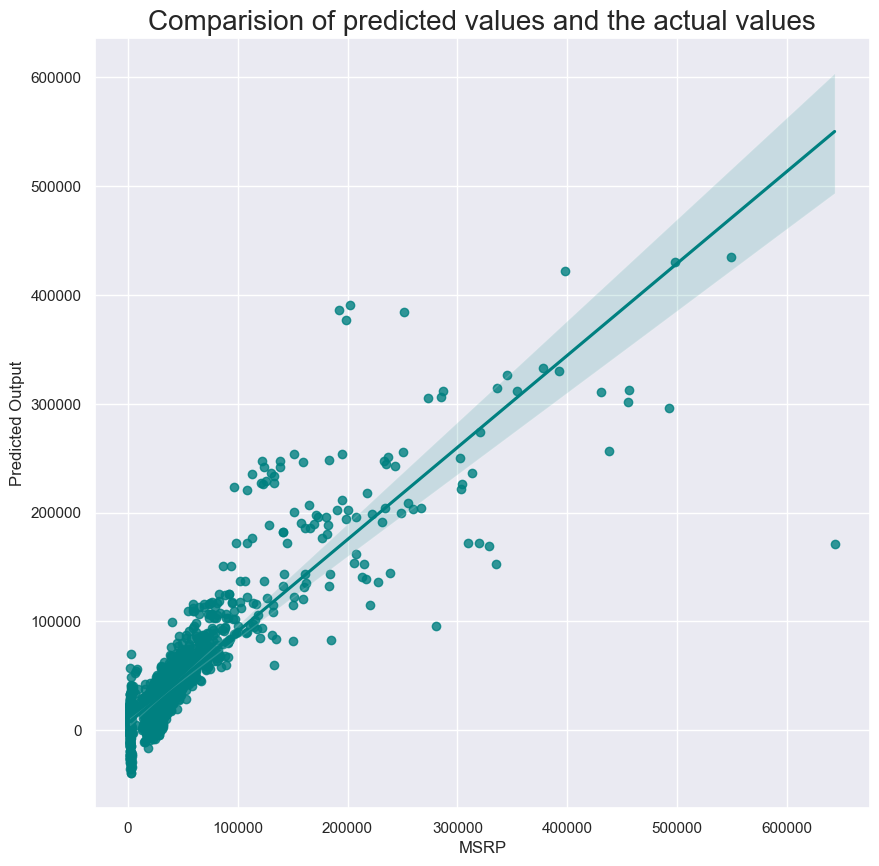

In [1100]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

## 4.2 K - Neighbors Regressor 

Below, we plot out using a regplot to get an understanding of how the data is spread out for K -Neighbors Regression.

In [1101]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.2.1 Regplot of K - Neighbors Regressor

We also use regplot again and plotting the predicted values and the actual predicted output values. We see that K - Neighbors Regressor did well in the testing set. The regression line again appears to fit the main trend well, but the spread of points around the line seems slightly more compact compared to linear regression. This might indicate better performance on average, but still, some predictions are quite far off as seen by the outliers. 

Therefore, K-Neighbors Regressor did a good job in giving the regression values and can be used for predictions in the future. However, it is also better to test other machine learning models and see how well they do so that we can finally decide the best model that can be used for future dataset deployment.

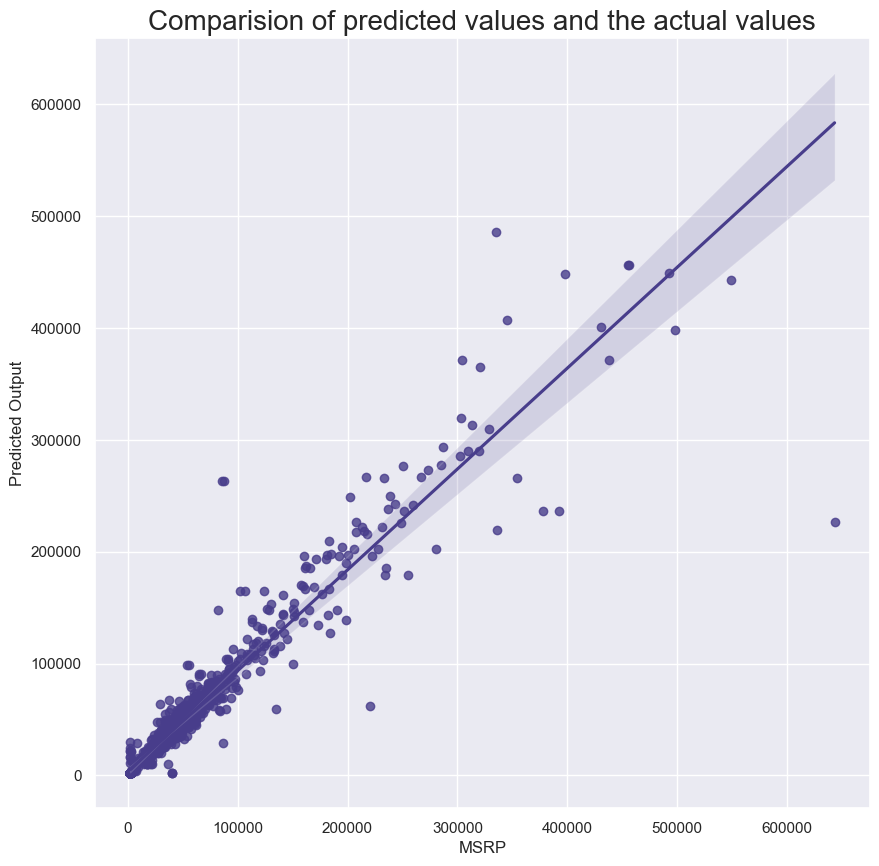

In [1102]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We will use the metrics that we have seen and storing those values in a list. We use the append method the elements and form a list. 

In [1103]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.3 Decision Tree Regressor

Below, we plot out using a regplot to get an understanding of how the data is spread out for Decision Tree Regressor.

In [1104]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.3.1 Regplot of Decision Tree Regressor

We also use regplot to plot the Decision Tree Regressor, Below, we see that decision tree regressor also does a very good job of predicting the right outputs for the test inputs. The points seem to follow a distinct pattern with some very accurate predictions, as indicated by the dense line of points along the x=y line (where predicted equals actual). However, there is also a significant number of points away from the line, indicating some predictions with large error.

Therefore, Decision Tree Regressor did a good job in giving the regression values and can be used for predictions in the future. However, it is also better to test other machine learning models and see how well they do so that we can finally decide the best model that can be used for future dataset deployment.

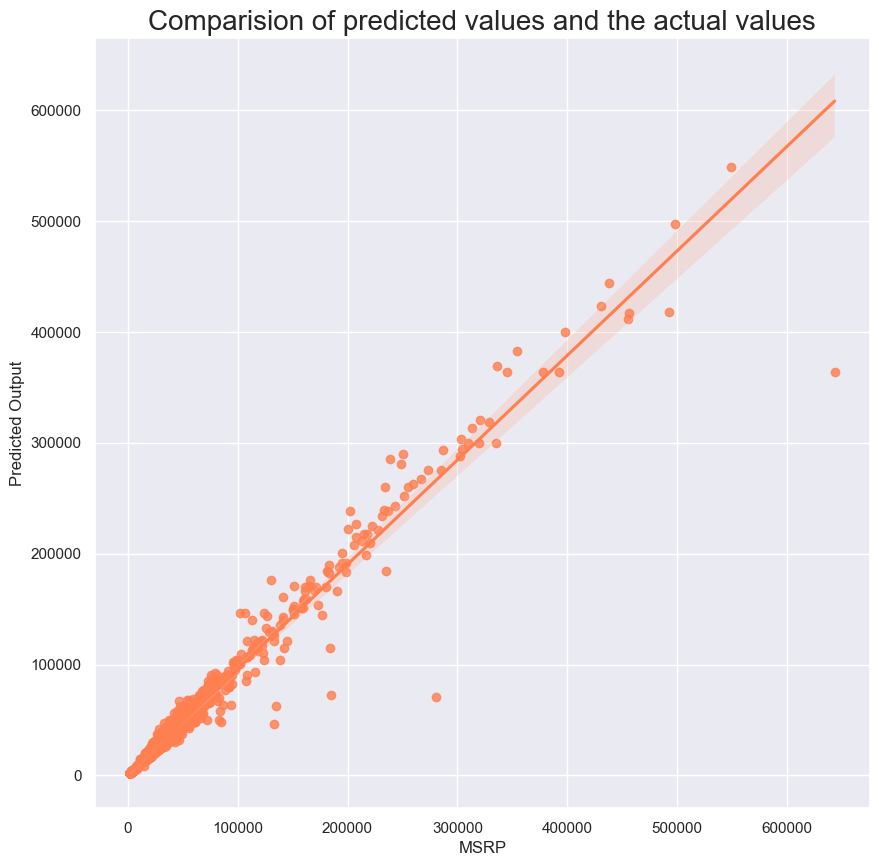

In [1105]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We will be appending the values to the list that we have created before, same as previously.

In [1106]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.4 Gradient Boosting Regressor

Below, we plot out using a regplot to get an understanding of how the data is spread out for Gradient Boosting Regressor.

In [1107]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

## 4.4.1 Regplot of Gradient Boosting Regressor 

We also use regplot to plot our the Gradient Boosting Regressor. We see that the gradient boosting regressor also did a fine job in getting the most accurate predictions. Similar to Decision Tree Regressor, the points follow a pattern that hugs the line more tightly, suggesting better performance. The predictions are clustered around the gression line with fewer extreme outliers, which is a sign of a potentially more accurate and robust model.

Therefore, Gradient Boosting Regressor did a good job in giving the regression values and can be used for predictions in the future. However, it is also better to test other machine learning models and see how well they do so that we can finally decide the best model that can be used for future dataset deployment.

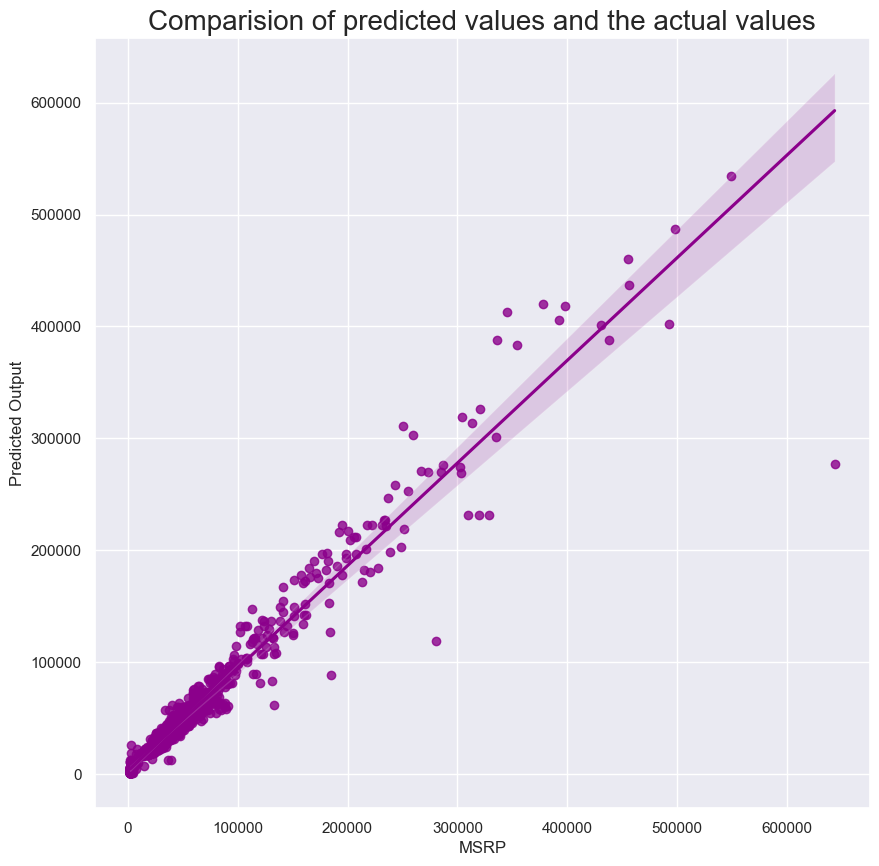

In [1108]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We will make use of the list and append the errors so that we could plot them later, same as before. 

In [1109]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

## 4.5 Observations when comparing all the regplot for the 4 types of machine learning model


In machine learning, we fit models to the training data using '.fit()'. This process involves the model learning the patterns in the training data. Then we use '.predict()' with the test data to get predictions, which are then compared to the actual outocmes form the test set to assess the model's performance. These predictions are what we see as "Predicted output" in the plots.

The regression line in these plots represents the relationship learned by the model. Ideally, for perfect predictions, all points would lie on the line where the predicted value equals the actual value (the diagonal line, if it were plotted) The closer the points to this hypothetical diagonal line, the better the model's prediction. 

When we compare the tightness of the scatter around the regressio linne in these graphs, the Gradient Boosting Regressor appears to be performing the best, followed by the K-Neighbors Regressor, Decision Tree Regress, and lastly the Linear Regression.

## 4.6 Dataframe of Machine Learning Models

Now, we make use of the results for the 2 metrics discuss at the start and make a dataframe. We will append the list values that we have been appending the error values and make a dataframe containing the models and the errors associated with them. 

In [1110]:
data = {'Models': ['Linear Regression', 'K Nearest Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)

We could have a look at the machine learning models dataframe that we have just created respectively.

In [1111]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,13197,596426039
1,K Nearest Regressor,4679,225933096
2,Decision Tree Regressor,3282,96159730
3,Gradient Boosting Regressor,4354,135348824


## 4.7 (a) Barplot of machine learning models with mean absolute error 

We use barplot to plot out the machine learning model with mean absolute error to understand the performance. We see that the mean absolute error for the machine learning model 'Linear Regression' is the highest. We also see from the graph that the 'Decision Tree Regressor' has the lowest mean absolute error. We can conclude that it is better to use the 'Decision Tree Regressor' for deploying and for predictions in the future as it has the lowest mean absolute error. 

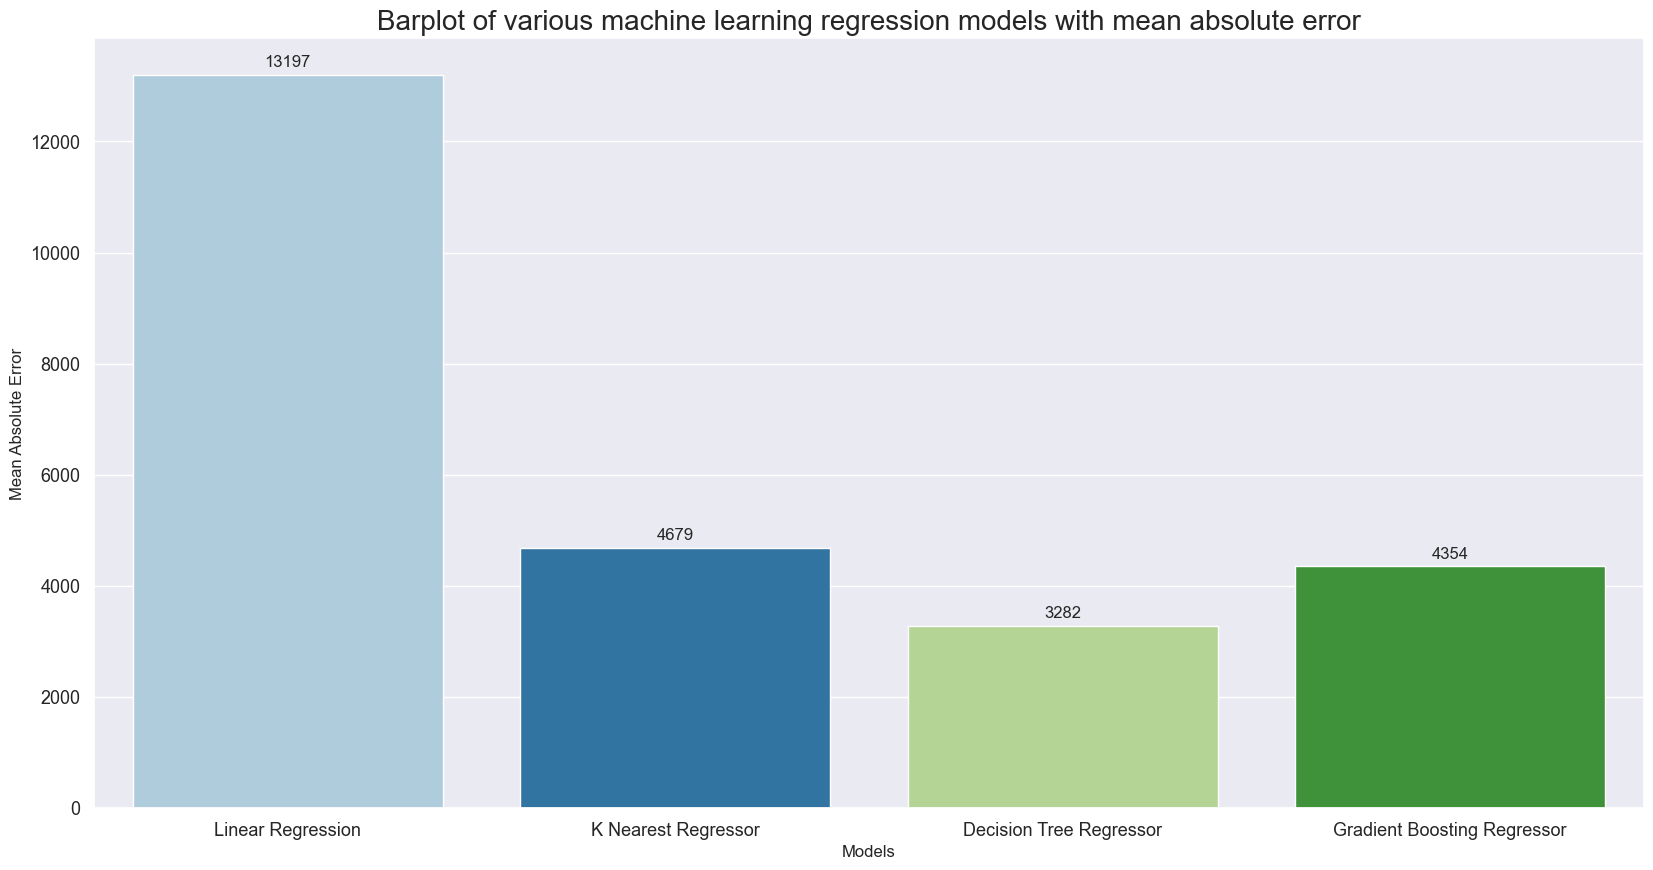

In [1112]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

## 4.7 (b) Barplot of machine learning models with mean squared error
 
We use barplot to plot out the machine learning model with mean squared error to understand the performance. We see that the mean squared error for the machine learning model 'Linear Regression' is the highest. We also see from the graph that the 'Decision Tree Regressor' has the lowest mean squared error. We can conclude that it is better to use the 'Decision Tree Regressor' for deploying and for predictions in the future as it has the lowest mean squared error.

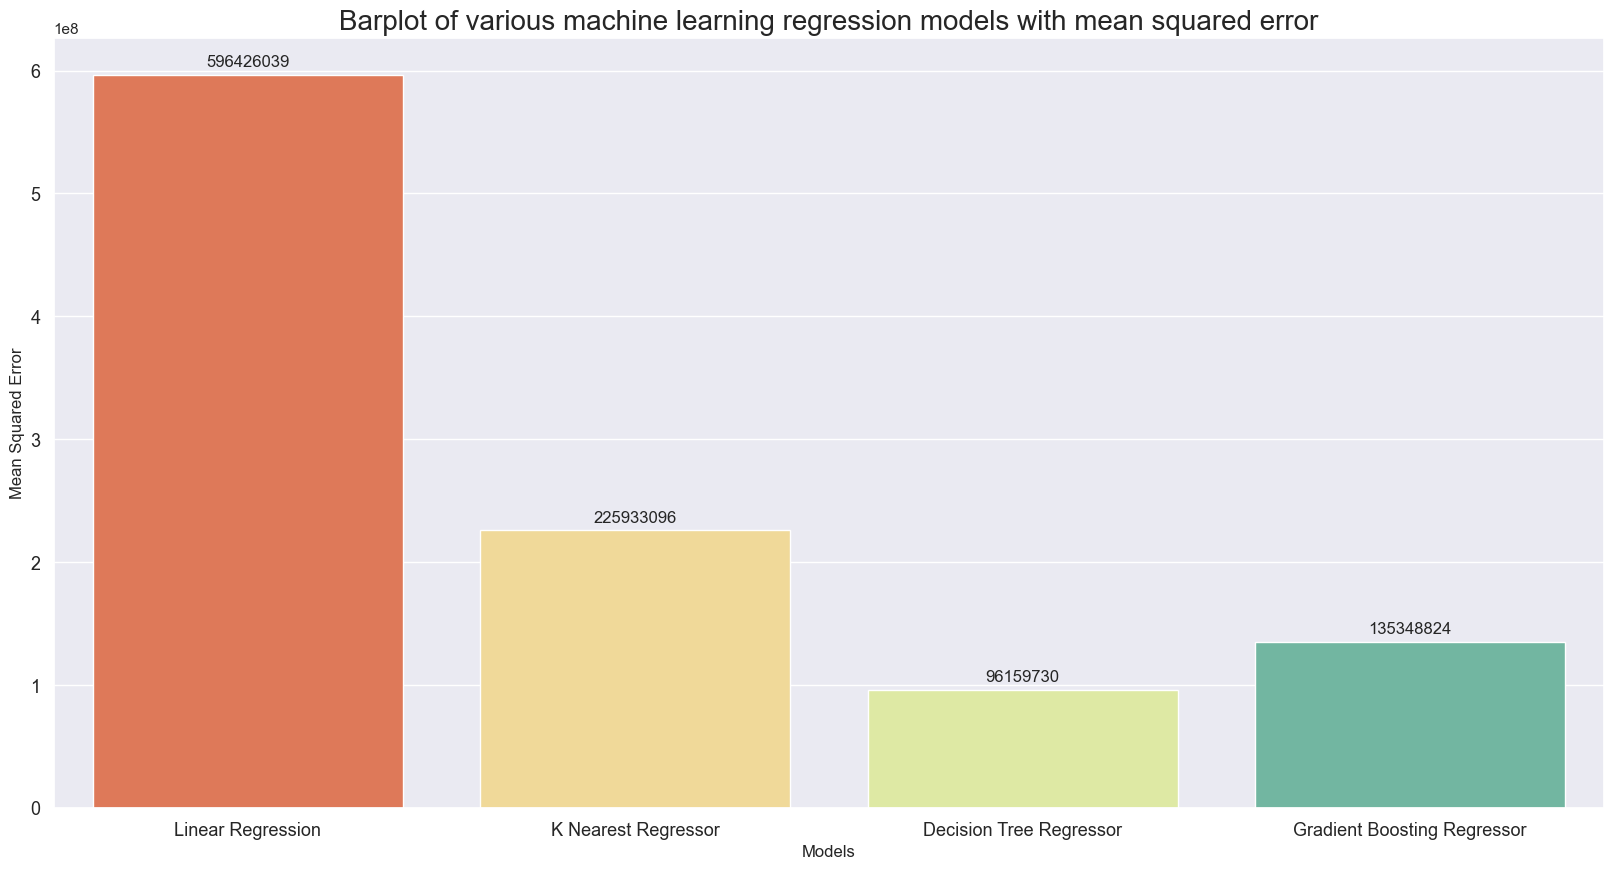

In [1113]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

## 4.8 Observations when using Barplot for comparing all the 4 types of machine learning model using MAE and MSE


As recap earlier,

Mean Absolute Error (MAE)


Importantly, this metric gives an average of the absolute differences between the predicted and actual values. It's straight forward and easy to interpret since it's in the sam eunits as the target variable. The lower the MAE, the better the model's performance.

Mean Squared Error (MSE)


Importantly, this metric squares the difference between the predicted and actual values, which penalizes larger errors more severely than smaller ones. Like MAE, a lower MSE indicates better performance, but because of the squaring, MSE is more sensitive to outliers than MAE.

When evaluating models, a model with both a low MAE and MSE is considered good, but these two metrics can sometimes tell a slightly different story. A low MAE with high MSE might indicate that while a model is generally accurate, there are a few predictions with large errors (potential outliers). Conversely, a high MAE with a low MSE might suggest that the model consistently makes moderate errors but doesn't have extreme errors.


The bar plots help to visualise these metrics across different models. In the context of car price prediction, we want to look at models that has the lowest bar in both MAE and MSE plots. 

To summarise, Decision Tree Regressor has the lowest for both MAE and MSE so it is predicts better and accurately, and this represents how well the model has learned from the training data and how it generalise to new, unseen data. Followed by Gradient Boosting Regressor, K - Nearest Regressor, and lastly Linear Regression.

## 5. Conclusion

For the above questions to address them:

In order to evaluate how we gonna predict the car price, we have to consider the questions chronologically.

1. Look at the car dataset and see the counting for each variables?
2. Are there any missing values in each variable of the dataset?
3. How is city mpg and highway mpg correlated using box plot? Address the outliers as well when comparing and for future machine learning test.
4. Which features are heavily correlated to one another by using heat map?
5. Check for NULL missing values, and make sure the data is filled or drop the variable so the machine learning will not encounter any problems?
6. Create a new column for Present Year (2024) and plot the Years of Manufacture, this variable will be considered as well for the machine learning model?
7. Check the data again for variables that has catergorical values, we have to address them by changing to numerical values for the machine learning to analyse?
8. Plot the different machine learning model and check which prediction model has the best result, in terms of lowest mean squared error (MSE) and lowest mean absolute error (MAE), when also checking for which range of values work best?


Answer:
1. We have observe all the variables and their count, e.g. 'Cheverolet has the highest number of cars followed by ford', 'in 2015 to 2017 which recent years has higher cars', 'Automatic or manual is higher and more relevant then cars with both automatend and manual mode', 'cars are using more unleaded engine fuel compared to electric','alot of compact cars and lesser large cars'.
2. We observe that 'Market Category' has alot of missing values followed by, 'Engine HP', 'Engine Cyclinders', 'Engine Fuel Type', 'Number of Doors'.
3. We have remove the outliers after using box plot for 'city mpg' and 'highway MPG'. We see that in terms of 'city mpg' most of the values that are present are in the range between 15 to 22 respectively. While in terms of 'highway MPG', we find that most of the values that are present are in the range 22 to 30 respectively. Therefore, we can see how the values are spread in the boxplot.
4. In the heatmap, we see that 'highway MPG' and 'city mpg' are highly related, with the value of 0.94. While also 'Engine HP' and 'Engine Cyliners' are also correlated 0.78. This correlation are important as it validates whether the data is true in our dataset. In the car industry, and above when we plot the scatterplot of 'highway MPG' and 'ciy mpg' we know that both must be related and they cannot differ, additionally for 'Engine HP' and 'Engine Cylinders' they are correlated as having higher number of cylinders will relate to higher number of horsepower in the car industry.
5. We drop 'Market Category' as there is too many unique text data and we also make sure the variables with missing values in 2. has been change to 0 missing values.
6. We have changed the Year of dataset so it represents how long the car has been manufactured since so the prediciton model will take note of this. We want to make sure the dataset we use is recent years of cars.
7. We use target encoding for the 'Year', 'Model' and 'Make' and the one hot encoding for the rest of the missing values 'Engine Fuel Type, 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', and 'Vehicle Style.
8. Based on the observation of regplot and barplot to compare the 4 different machine learning models, as a tighter clustering of points around y=x line indicates better preddictions, and a narrower confidence band around the line of best fit also suggests higher accuracy, Gradient Boosting Regressor fits the best, followed by the K-Neighbors Regressor, Decision Tree Regressor, and lastly the Linear Regression. Whereas for barplot when comparing with metrics of MAE and MSE, Decision Tree Regressor has the lowest for both MAE and MSE so it is predicts better and accurately, and this represents how well the model has learned from the training data and how it generalise to new, unseen data. Followed by Gradient Boosting Regressor, K - Nearest Regressor, and lastly Linear Regression.
